# Processing Simulation Data
This notebook is to be used as a local tool to process simulation data that is generated after running ```run_sim/sh``` in the repository. This allows all simulation information to be aggregated nicely and averaged. PANDAS is the primary tool for processing the data.

Please be aware that this is a prototype of functionality presented in ```paper_figures.py``` in the main directory of this repo.

In [1]:
#imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython.display import display
from matplotlib.colors import LogNorm
from matplotlib import cm
import os

%matplotlib inline

plt.rcParams['xtick.labelsize'] = 32
plt.rcParams['ytick.labelsize'] = 32
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['figure.figsize'] = (17,10)
# print plt.rcParams.keys()

In [2]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments/nonmyopic/'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

In [3]:
# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

In [4]:
#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

mean_data.head(5)
print len(mean_data)

7000


In [671]:
#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mes[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

mes_data.head(5)
print len(mes_data)

7000


In [672]:
#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_ei[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

ei_data.head(5)
print len(ei_data)

7000


## Getting Averages at the End of Time
First, let's go ahead and get a snapshot of the last frame for all of these simulations

In [673]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, 0.0
MES :    174.0, 0.0
EI  :    174.0, 0.0
-------------
info_gain
MEAN:    22983.8825865, 945.059840378
MES :    21727.1513966, 1008.17089552
EI  :    24739.6428968, 860.30244621
-------------
aqu_fun
MEAN:    346924.645591, 14421.204272
MES :    465.690284652, 38.5389875389
EI  :    44447.0987258, 1714.15632434
-------------
MSE
MEAN:    0.480913305469, 0.478486018301
MES :    0.712675935689, 0.435408572347
EI  :    0.178213360282, 0.238189035137
-------------
hotspot_error
MEAN:    0.683831064383, 0.669294460648
MES :    1.06385234154, 0.709743756108
EI  :    0.227952247589, 0.183483070308
-------------
max_loc_error
MEAN:    0.947489315459, 1.78483333453
MES :    0.837604727633, 1.68230611058
EI  :    0.837604727633, 1.68230611058
-------------
max_val_error
MEAN:    0.714902795381, 0.526589737882
MES :    0.71235631663, 0.515212082834
EI  :    0.705368750223, 0.541802468488
-------------
simple_regret
MEAN:    3.56501489992, 2.90958759969
MES : 

## Looking at Samples
Now, we'll take a look at the relative distance from the best hotspot the samples across the trials were taken.

In [674]:
# get the robot log files
max_val = []
max_loc = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'log' in name and 'mean' in root:
            temp = open(root+'/'+name, "r")
            for l in temp.readlines():
                if "max value" in l:
                    max_val.append(float(l.split(" ")[3]))
                    max_loc.append((float(l.split(" ")[6].split("[")[1]), float(l.split(" ")[7].split("]")[0])))

In [675]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 1.5]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 1.5]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 1.5]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


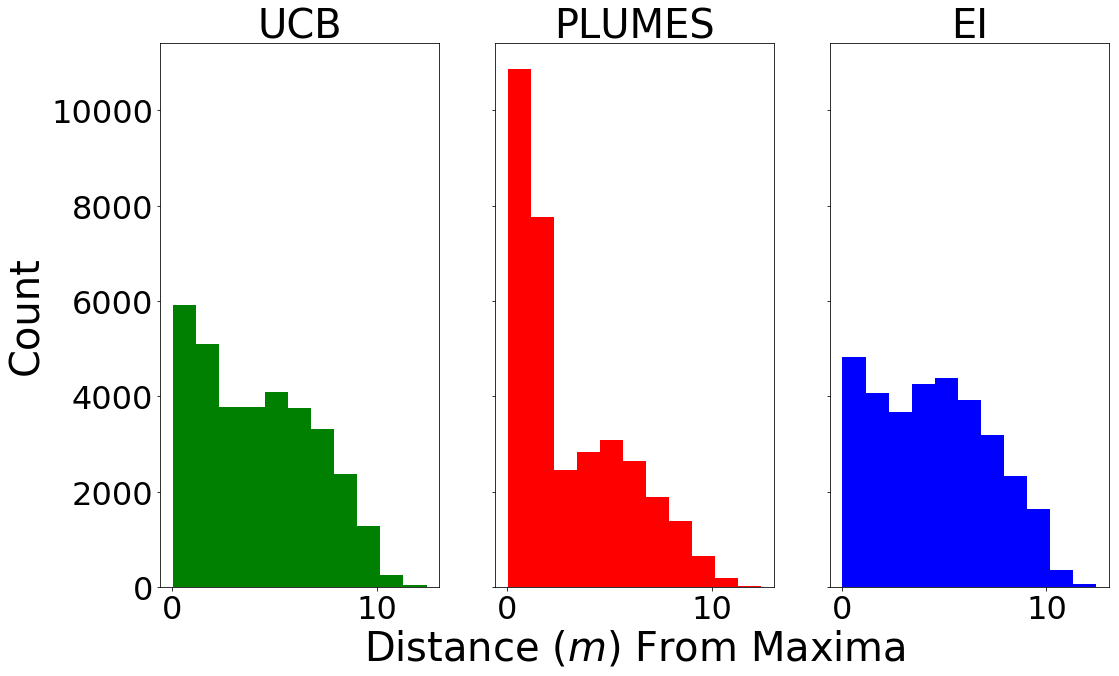

In [687]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("PLUMES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples.png')
plt.show()

[0.2352034289595822, 0.4584685476662056, 0.1963975464078998]
[0.16030113542705182, 0.10989371021329224, 0.10857614202825008]


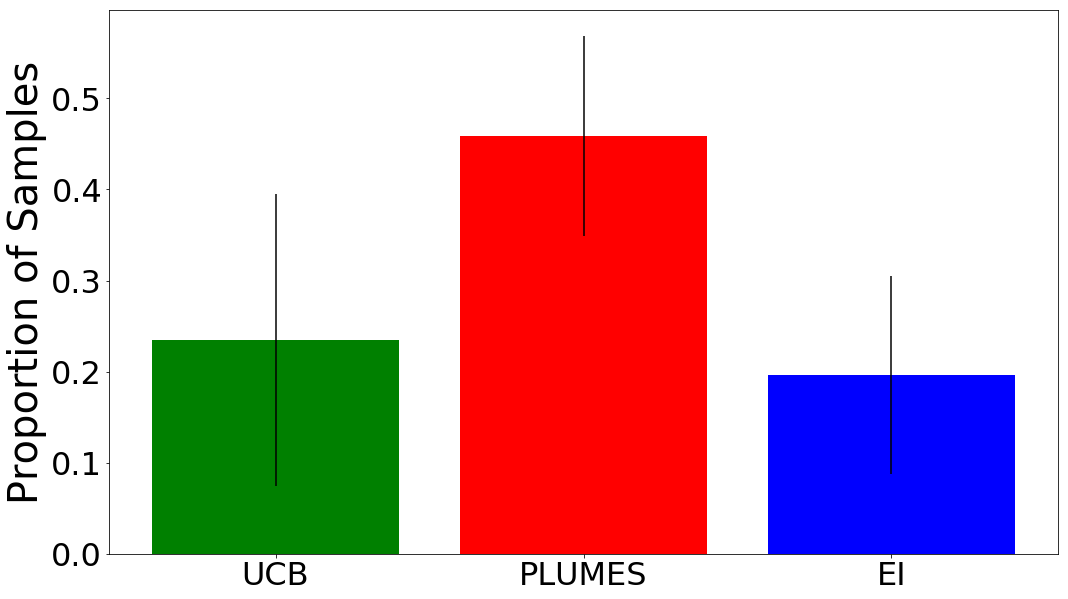

In [688]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'PLUMES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples')

print [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)]
print [np.std(m) for m in (mean_prop, mes_prop, ei_prop)]

plt.show()

## Getting Rates of Convergence
What about how things progress over time? Do things converge? When? Is it consistent? These sets of plots and figures attempt to address convergence; which hopefully lends itself to stopping criteria.

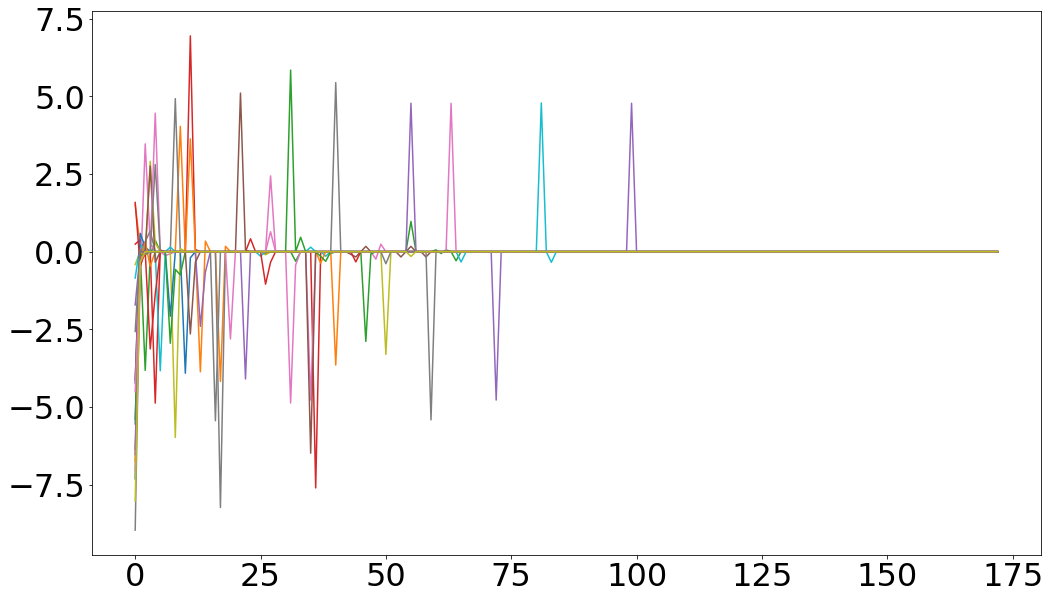

In [568]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mean_data[mean_data.time == j+1]['max_loc_error'].values[i]-mean_data[mean_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

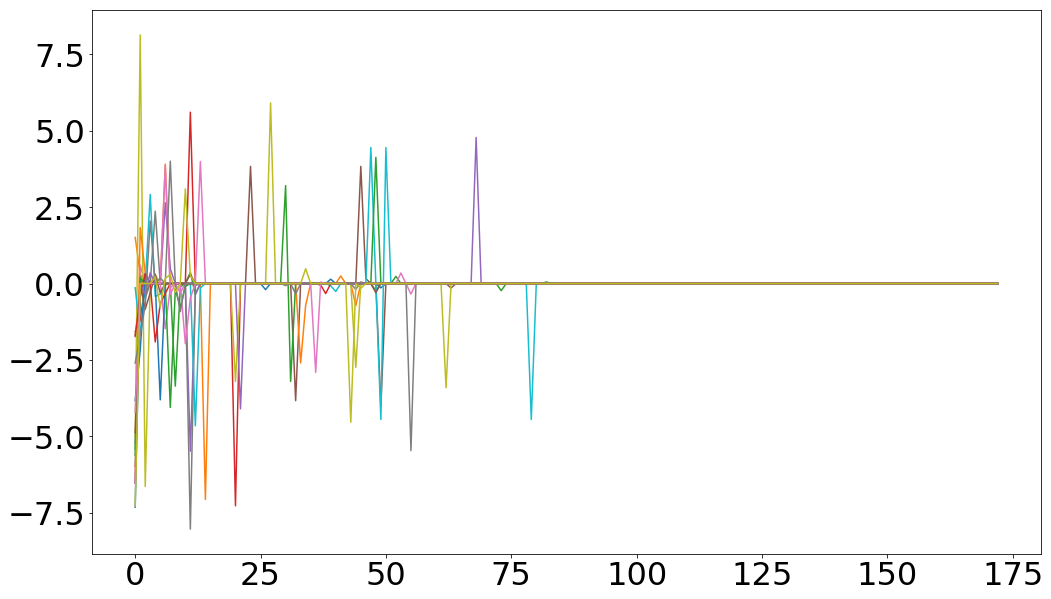

In [569]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mes_data[mes_data.time == j+1]['max_loc_error'].values[i]-mes_data[mes_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

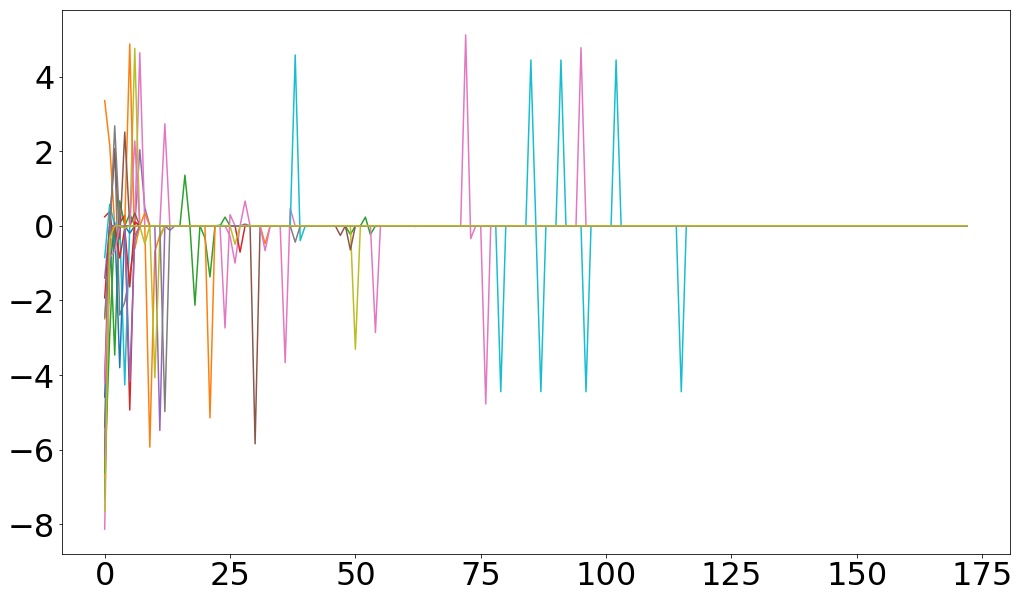

In [570]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(ei_data[ei_data.time == j+1]['max_loc_error'].values[i]-ei_data[ei_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

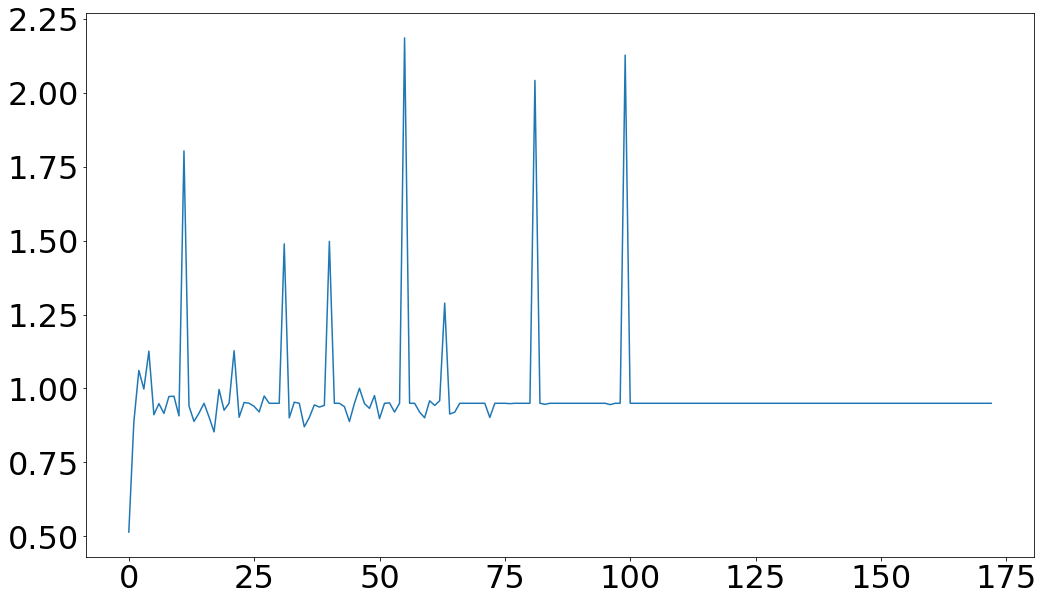

In [571]:
#based upon the definition of rate of convergence
a_mean = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((mean_data[mean_data.time == j+1]['max_loc_error'].values[i]-0) / (mean_data[mean_data.time == j]['max_loc_error'].values[i]-0))
    a_mean = [m+n for m,n in zip(a_mean,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a_mean])
plt.show()

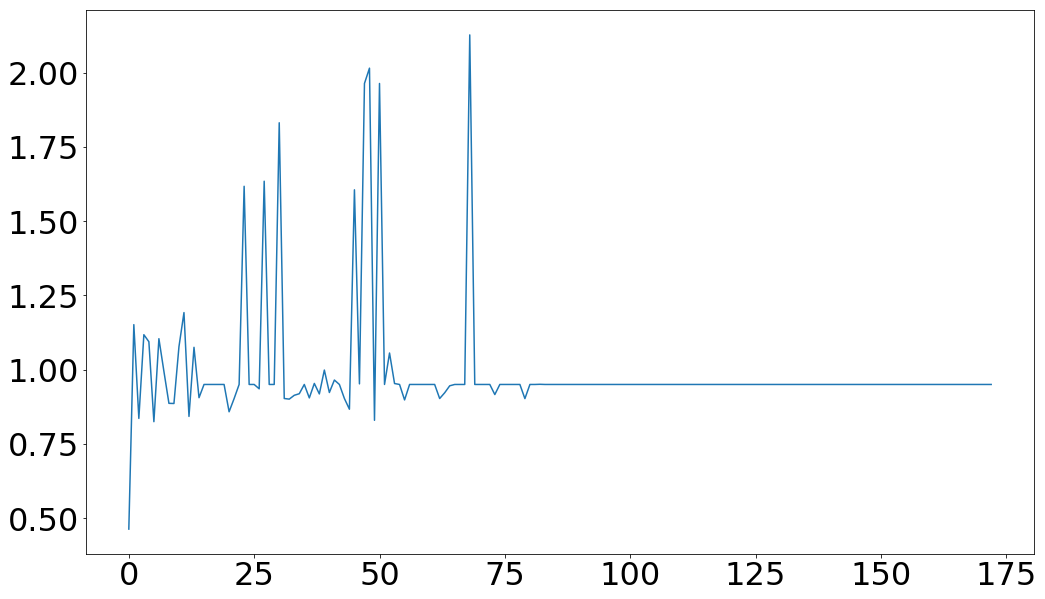

In [572]:
#based upon the definition of rate of convergence
a_mes = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((mes_data[mes_data.time == j+1]['max_loc_error'].values[i]-0) / (mes_data[mes_data.time == j]['max_loc_error'].values[i]-0))
    a_mes = [m+n for m,n in zip(a_mes,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a_mes])
plt.show()

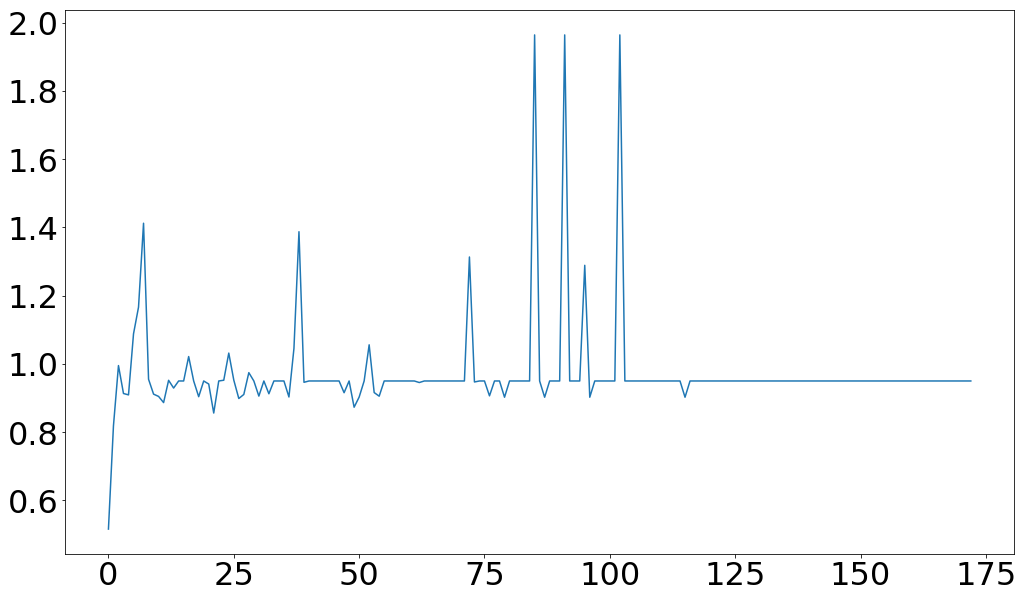

In [573]:
#based upon the definition of rate of convergence
a = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((ei_data[ei_data.time == j+1]['max_loc_error'].values[i]-0) / (ei_data[ei_data.time == j]['max_loc_error'].values[i]-0))
    a = [m+n for m,n in zip(a,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a])
plt.show()

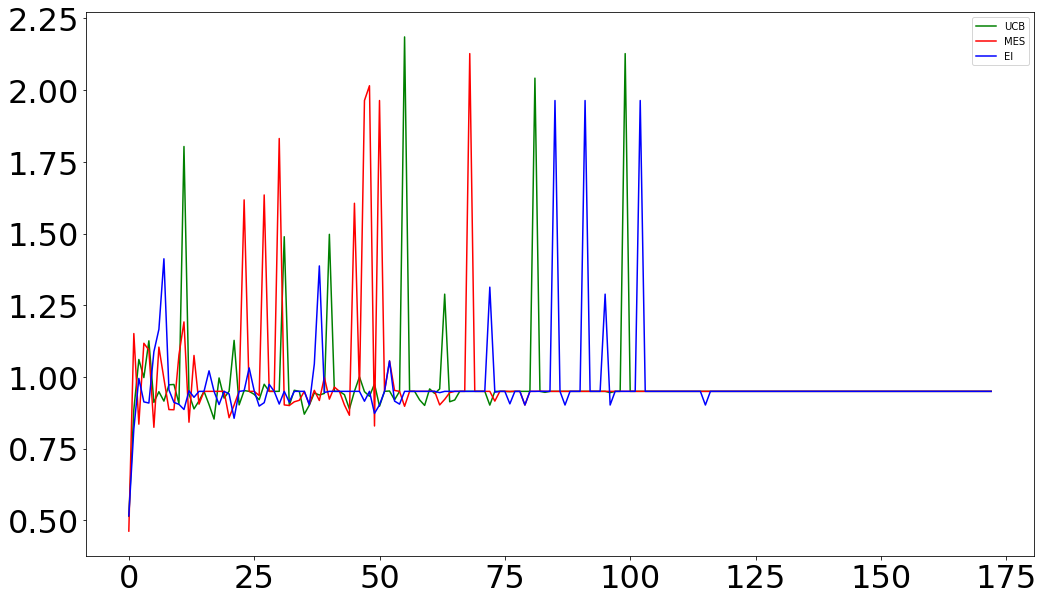

In [574]:
plt.plot([l/20 for l in a_mean], 'g', label='UCB')
plt.plot([l/20 for l in a_mes], 'r', label='MES')
plt.plot([l/20 for l in a], 'b', label='EI')
plt.legend()
plt.show()

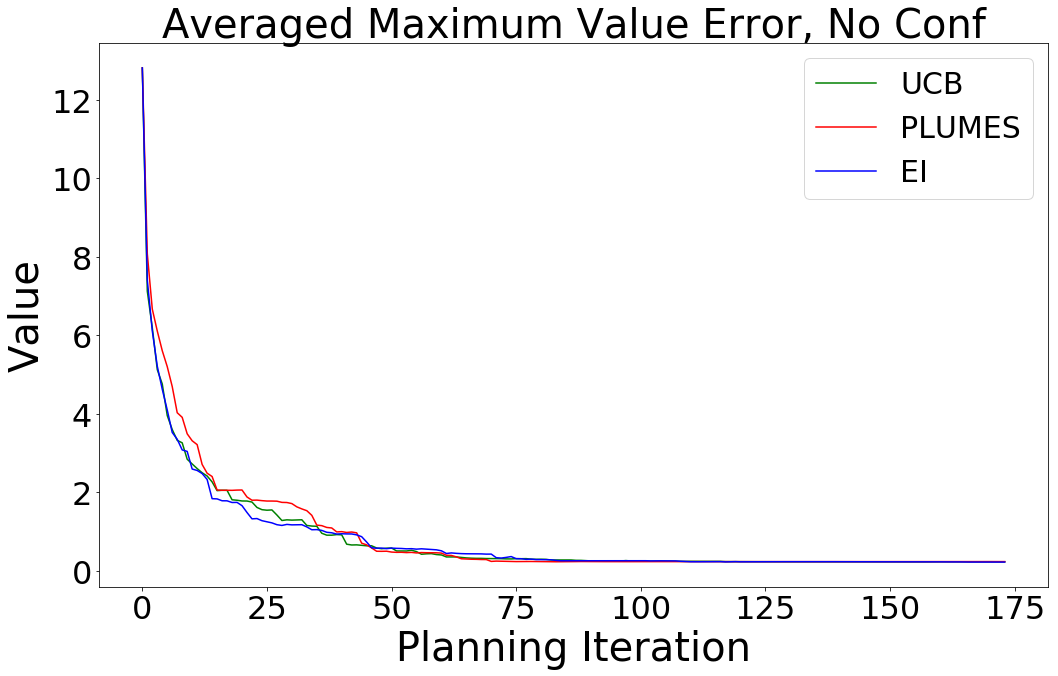

In [692]:
def make_plots(param,title,d=20, plot_confidence=False, save_fig=False, lab="Value", fname="fig"):
    #based upon the definition of rate of convergence
    ucb = [0 for m in range(174)]
    mes = [0 for m in range(174)]
    ei = [0 for m in range(174)]
    
    ucb_v = []
    mes_v = []
    ei_v = []
    
    for i in range(19):
        sm = []
        sme = []
        se = []
        for j in range(174):
            sm.append((mean_data[mean_data.time == j][param].values[i]))
            sme.append((mes_data[mes_data.time == j][param].values[i]))
            se.append((ei_data[ei_data.time == j][param].values[i]))
        ucb = [m+n for m,n in zip(ucb,sm)]
        mes = [m+n for m,n in zip(mes,sme)]
        ei = [m+n for m,n in zip(ei,se)]
        
        ucb_v.append(sm)
        mes_v.append(sme)
        ei_v.append(se)

        
    vucb = []
    vmes = []
    vei = []
    for i in range(174):
        t1 = []
        t2 = []
        t3 = []
        for m, n, o in zip(ucb_v, mes_v, ei_v):
            t1.append(m[i])
            t2.append(n[i])
            t3.append(o[i])
        vucb.append(np.std(t1))
        vmes.append(np.std(t2))
        vei.append(np.std(t3))
    
    plt.plot([l/d for l in ucb], 'g', label='UCB')
    plt.plot([l/d for l in mes], 'r', label='PLUMES')
    plt.plot([l/d for l in ei], 'b', label='EI')
    
    if plot_confidence:
        x = [i for i in range(174)]
        y1 = [l/d + m for l,m in zip(ucb,vucb)]
        y2 = [l/d - m for l,m in zip(ucb,vucb)]

        y3 = [l/d + m for l,m in zip(mes,vmes)]
        y4 = [l/d - m for l,m in zip(mes,vmes)]

        y5 = [l/d + m for l,m in zip(ei,vei)]
        y6 = [l/d - m for l,m in zip(ei,vei)]

        plt.fill_between(x, y1, y2, color='g', alpha=0.2)
        plt.fill_between(x, y3, y4, color='r', alpha=0.2)
        plt.fill_between(x, y5, y6, color='b', alpha=0.2)
    
    plt.legend(fontsize=30)
    plt.xlabel("Planning Iteration")
    plt.ylabel(lab)
    
    if save_fig:
        plt.savefig(fname)
    plt.title(title)
    plt.show()

make_plots('max_val_error', 'Averaged Maximum Value Error, No Conf', 40, False, True, fname='avg_valerr_nconf')

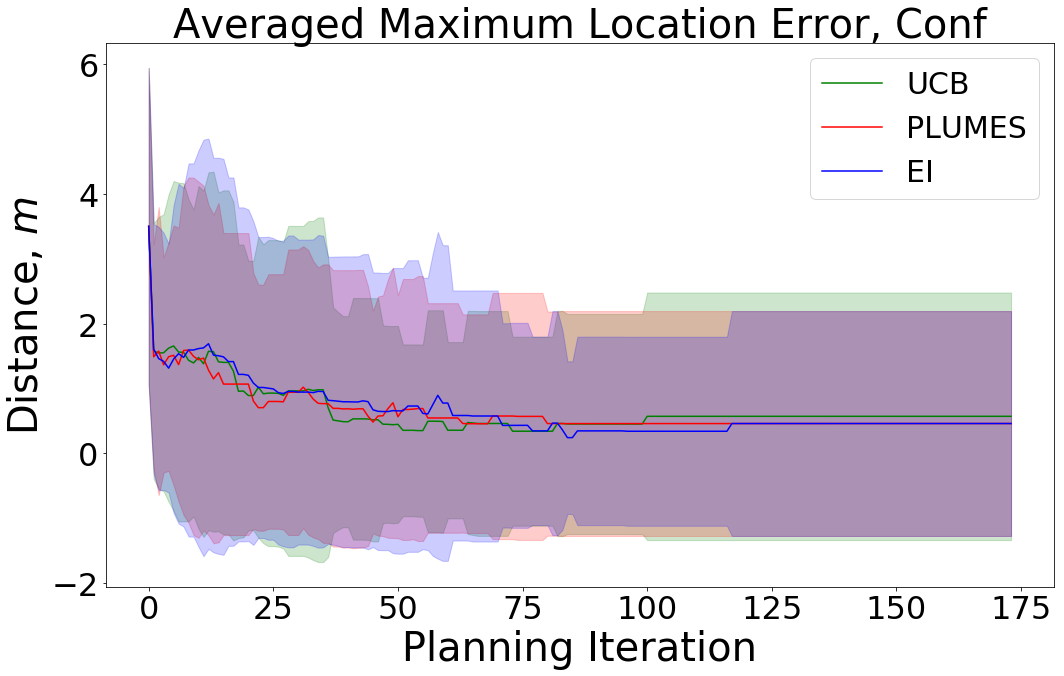

In [694]:
make_plots('max_loc_error', 'Averaged Maximum Location Error, Conf',40, True, True, "Distance, $m$", fname='avg_locerr_conf')

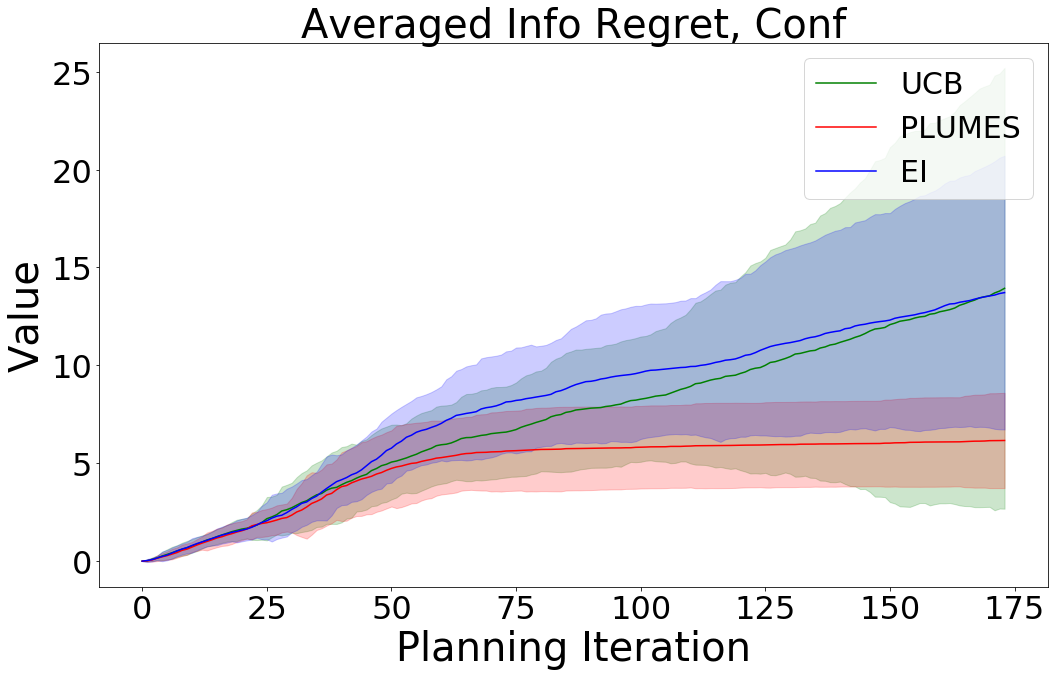

In [697]:
make_plots('info_regret', 'Averaged Info Regret, Conf', 40, True, True, fname='avg_reg_conf')

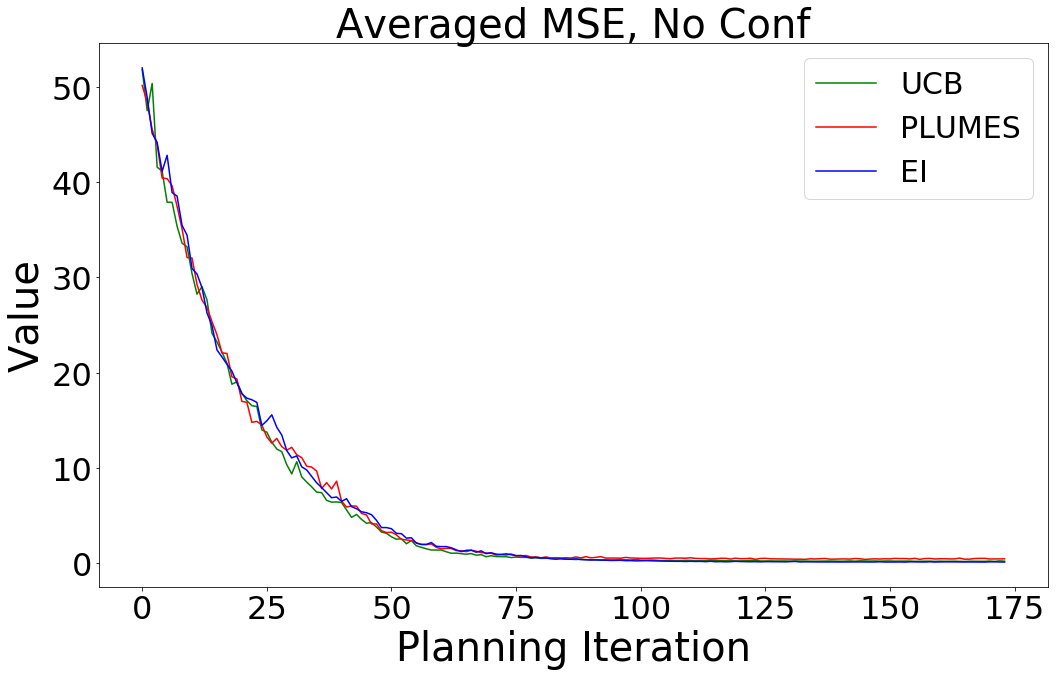

In [699]:
make_plots('MSE', 'Averaged MSE, No Conf', 40, False, True, fname='avg_mse_nconf')

In [700]:
# Let's count how many of these fail to converge to the right place
# TODO

## Stopping Criteria
We have a hunch that the time to stop for MES is when the stars converge and the robot does along with it. Let's take a look at some of the simulations and see if this lines up with reality. We'll first do a close analysis of the first simulation; generate something generic, then iterate through all the simulations to see what's up!

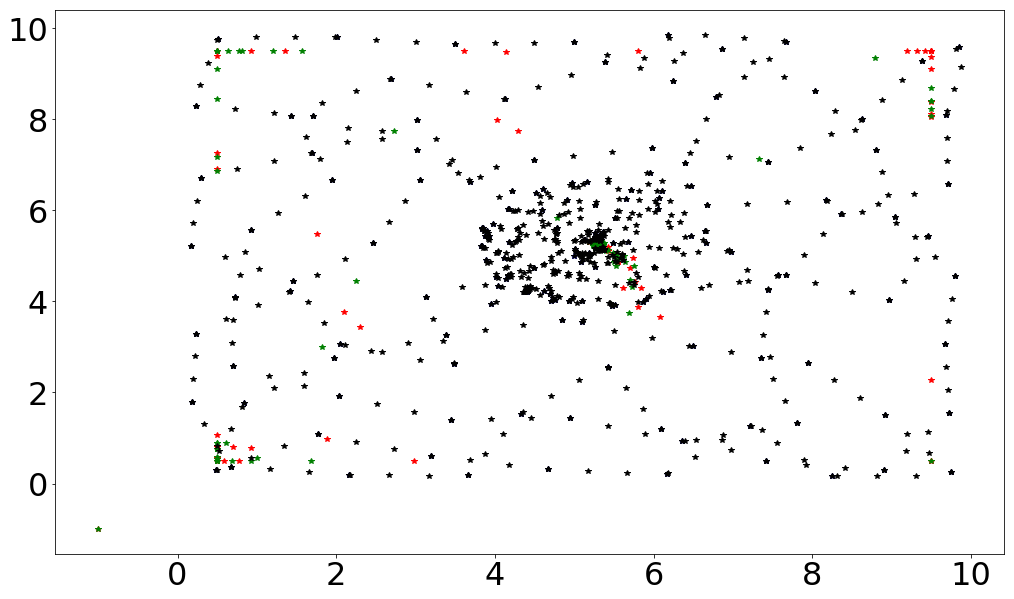

In [619]:
mes_data.head(2)
plt.plot(mes_data['robot_loc_x'].values[0:174], mes_data['robot_loc_y'].values[0:174], 'b*')
plt.plot(mes_data['star_obs_loc_x_0'].values[0:174], mes_data['star_obs_loc_y_0'].values[0:174], 'r*')
plt.plot(mes_data['star_obs_loc_x_1'].values[0:174], mes_data['star_obs_loc_y_1'].values[0:174], 'g*')

samp_vals_x = mes_sdata[(mes_sdata['x'] == mes_data['robot_loc_x'].values[174]) & (mes_sdata['y'] == mes_data['robot_loc_y'].values[174])]
idx = samp_vals_x.index[-1]

plt.plot(mes_sdata['x'].values[0:idx], mes_sdata['y'].values[0:idx], 'k*')

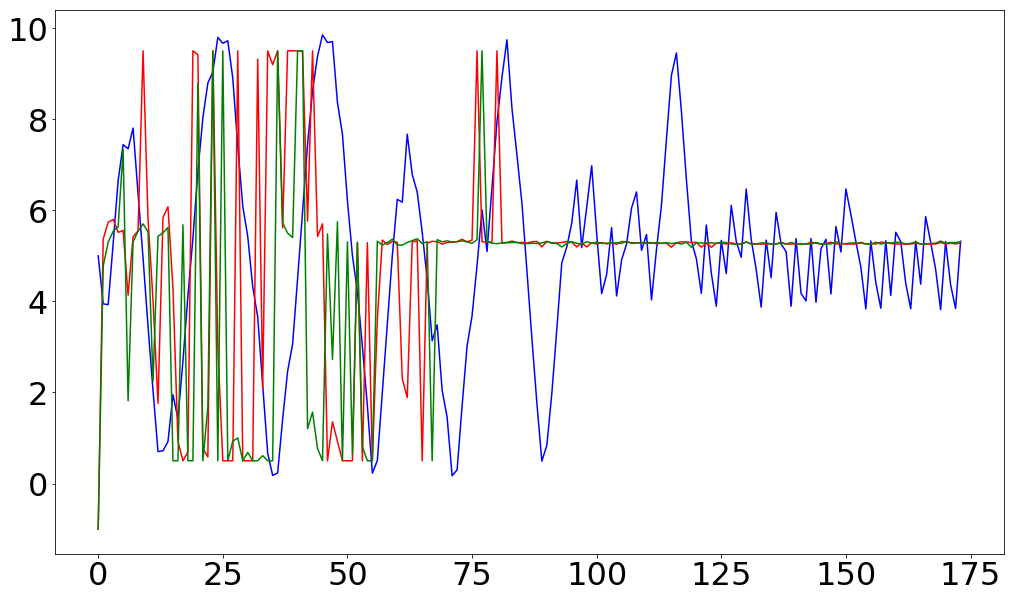

In [620]:
plt.plot(mes_data['robot_loc_x'].values[0:174], 'b')
plt.plot(mes_data['star_obs_loc_x_0'].values[0:174], 'r')
plt.plot(mes_data['star_obs_loc_x_1'].values[0:174], 'g')
plt.show()

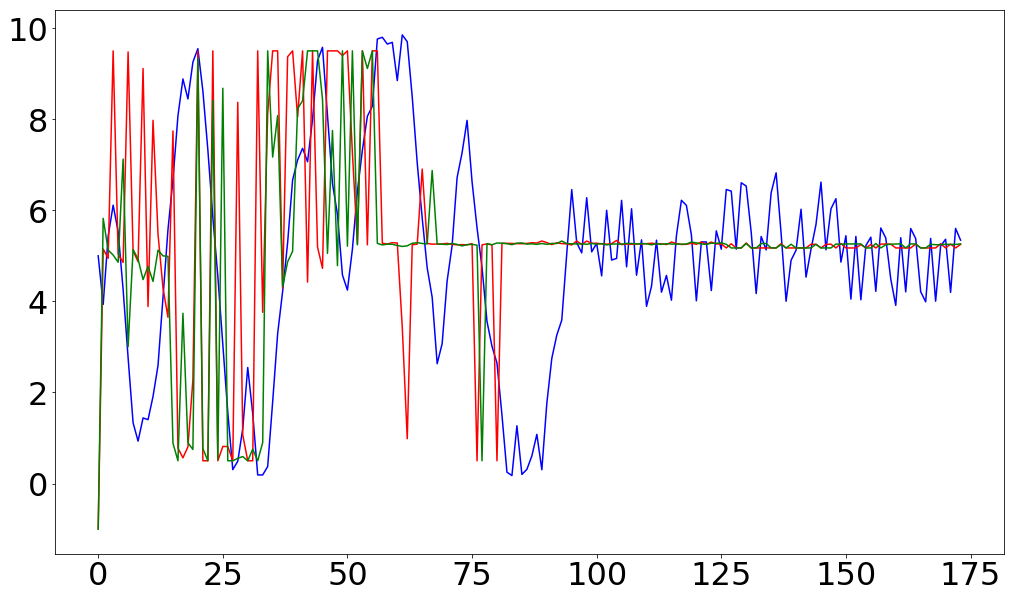

In [621]:
plt.plot(mes_data['robot_loc_y'].values[0:174], 'b')
plt.plot(mes_data['star_obs_loc_y_0'].values[0:174], 'r')
plt.plot(mes_data['star_obs_loc_y_1'].values[0:174], 'g')
plt.show()

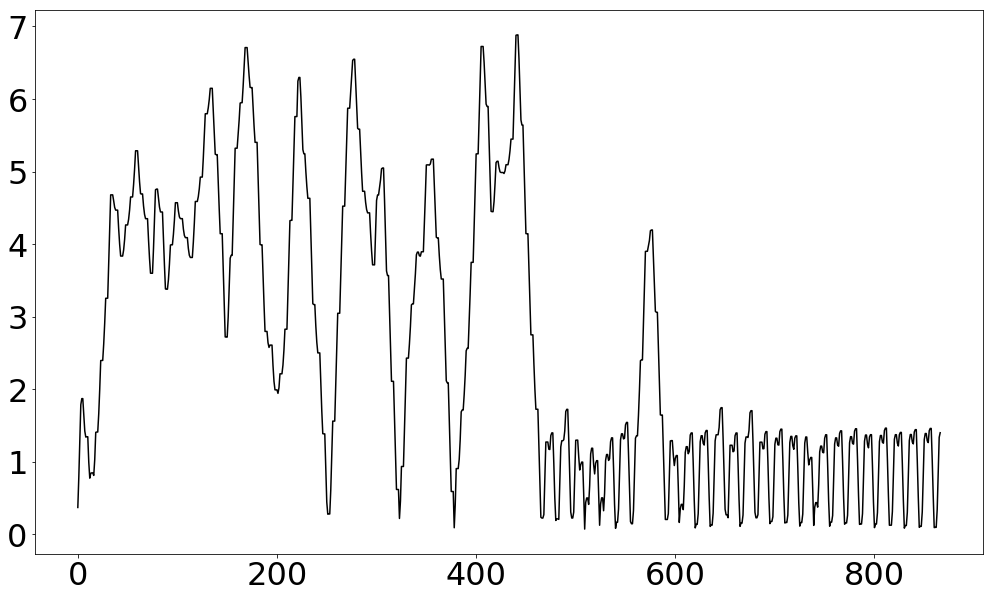

In [622]:
plt.plot(mes_sdata['Distance'].values[0:idx], 'k')

In [623]:
# Let's try to formulate the stopping criteria then

# Let's signal when the stars converge
def check_star_convergence(s0x, s0y, s1x, s1y, xlen, ylen):
    if np.fabs(s0x-s1x) < 0.01*xlen and s0x != -1:
        if np.fabs(s0y-s1y) < 0.01*ylen and s0y != -1:
            return True
    return False

# And when the vehicle has converged to that point
def check_vehicle_at_stars(rx, ry, s0x, s0y, s1x, s1y, trajlen):
    sx = (s0x+s1x)*0.5
    sy = (s0y+s1y)*0.5
    if np.fabs(sx-rx) < trajlen*0.5:
        if np.fabs(sy-ry) < trajlen*0.5:
            return True
    return False

# And we want to collect enough samples at the convergence area
def check_samples(num_samps, thresh):
    if num_samps >= thresh:
        return True
    return False
    

In [624]:
# Now, let's see!
def run_stopping_criteria(v, sampx, sampy):
    xlen = ylen = 10
    trajlen = 1.5
    time_to_stop = 174
    thresh = 100

    for i in range(174):
        num_samps = 0
        rx = mes_data['robot_loc_x'].values[i+175*v]
        ry = mes_data['robot_loc_y'].values[i+175*v]
        s0x = mes_data['star_obs_loc_x_0'].values[i+175*v]
        s1x = mes_data['star_obs_loc_x_1'].values[i+175*v]
        s0y = mes_data['star_obs_loc_y_0'].values[i+175*v]
        s1y = mes_data['star_obs_loc_y_1'].values[i+175*v]

        if check_star_convergence(s0x, s0y, s1x, s1y, xlen, ylen):
            if check_vehicle_at_stars(rx, ry, s0x, s0y, s1x, s1y, trajlen):
                samp_id = sampsx.index(rx)
                dist = [np.sqrt((x-rx)**2 + (y-ry)**2) for x,y in zip(sampx[0:samp_id], sampy[0:samp_id])]
                for d in dist:
                    if d < 1.5*0.5:
                        num_samps += 1
                if check_samples(num_samps, thresh):
                    time_to_stop = i
                    break

#     plt.plot(mes_data['robot_loc_x'].values[0+175*v:174+175*v], 'b')
#     plt.plot(mes_data['star_obs_loc_x_0'].values[0+175*v:174+175*v], 'r')
#     plt.plot(mes_data['star_obs_loc_x_1'].values[0+175*v:174+175*v], 'g')
#     plt.axvline(time_to_stop, color='r')
#     plt.show()
    
    if time_to_stop == 174:
        plt.plot(mes_data['robot_loc_x'].values[0+175*v:174+175*v], 'b')
        plt.plot(mes_data['star_obs_loc_x_0'].values[0+175*v:174+175*v], 'r')
        plt.plot(mes_data['star_obs_loc_x_1'].values[0+175*v:174+175*v], 'g')
        plt.axvline(time_to_stop, color='r')
        plt.title("Stopping Fails")
        print v
        plt.show()
    
    actual_final = [mes_data['info_regret'].values[174+175*v],
                    mes_data['MSE'].values[174+175*v],
                    mes_data['max_loc_error'].values[174+175*v],
                    mes_data['max_val_error'].values[174+175*v]]
    
    stopped_final = [mes_data['info_regret'].values[time_to_stop+175*v],
                     mes_data['MSE'].values[time_to_stop+175*v],
                     mes_data['max_loc_error'].values[time_to_stop+175*v],
                     mes_data['max_val_error'].values[time_to_stop+175*v]
                    ]
    
    return actual_final, stopped_final

27


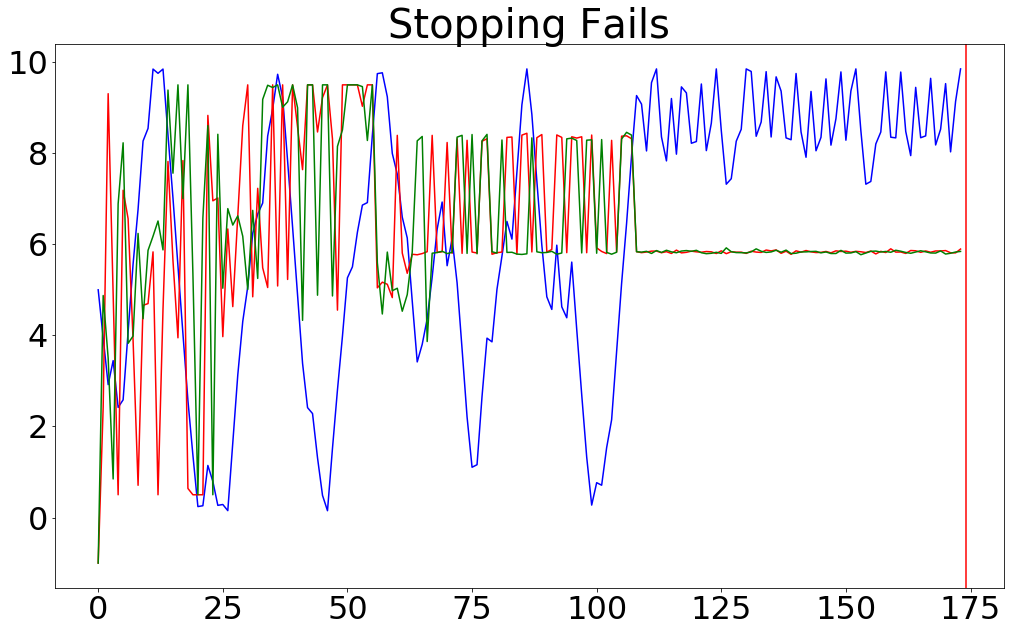

In [625]:
# automating
# plt.plot(mes_sdata['x'])
# print mes_data[mes_data['robot_loc_x']==5.0].index
# print mes_data['robot_loc_x'].values[175]
idx = 0
true = []
stop = []
for i in range(40):
    sampsx = mes_sdata['x'].values.tolist()
    ids = [m for m in range(len(sampsx)) if sampsx[m] == 5.0]
    try:
        nextidx = ids[i+1]
    except:
        nextidx = -1
    sampsx = mes_sdata['x'].values[idx:nextidx].tolist()
    sampsy = mes_sdata['y'].values[idx:nextidx].tolist()
    actual, stopped = run_stopping_criteria(i,sampsx, sampsy)
    idx = nextidx
    true.append(actual)
    stop.append(stopped)

In [626]:
print 'Param: Budget, Stopped'
for t,s in zip(true,stop):
    print '------'
    print 'Info Regret: ' + str(t[0]) + ', ' + str(s[0])
    print 'MSE:         ' + str(t[1]) + ', ' + str(s[1])
    print 'Loc Error    ' + str(t[2]) + ', ' + str(s[2])
    print 'Val Error    ' + str(t[3]) + ', ' + str(s[3])
        

Param: Budget, Stopped
------
Info Regret: 12.786325840131717, 12.78070656448765
MSE:         0.11096017645357731, 0.2758008168088309
Loc Error    0.12833153923530718, 0.12833153923530718
Val Error    1.1942030774489396, 1.1969259392216995
------
Info Regret: 14.860274255988063, 13.797832893643822
MSE:         0.39798914385193845, 0.3394687124227399
Loc Error    0.3490995292499337, 0.3490995292499337
Val Error    0.3245487551944634, 0.33484708752244785
------
Info Regret: 10.486353960702125, 10.090023778728291
MSE:         0.7877759483307238, 1.0852952593210279
Loc Error    0.11039496425223656, 0.11039496425223656
Val Error    1.0133474004013792, 1.0187855730595032
------
Info Regret: 11.525157377896303, 11.343008582068068
MSE:         0.825918718105002, 1.070736557272884
Loc Error    0.31224411132641033, 0.31224411132641033
Val Error    0.500913726479844, 0.4899428281182309
------
Info Regret: 14.393547126184234, 13.369491820281718
MSE:         0.398016811642102, 0.5349382432611647
Lo

In [629]:
# Let's see the averages?
info_reg_true = [m[0] for m in true]
info_reg_stop = [m[0] for m in stop]

mse_true = [m[1] for m in true]
mse_stop = [m[1] for m in stop]

loc_true = [m[2] for m in true]
loc_stop = [m[2] for m in stop]

val_true = [m[3] for m in true]
val_stop = [m[3] for m in stop]

print 'Info Regret, Mean and STD'
print 'True: ', np.mean(info_reg_true), np.std(info_reg_true)
print 'Stop: ', np.mean(info_reg_stop), np.std(info_reg_stop)
print 'MSE, Mean and STD'
print 'True: ', np.mean(mse_true), np.std(mse_true)
print 'Stop: ', np.mean(mse_stop), np.std(mse_stop)
print 'Loc Error, Mean and STD'
print 'True: ', np.mean(loc_true), np.std(loc_true)
print 'Stop: ', np.mean(loc_stop), np.std(loc_stop)
print 'Val Error, Mean and STD'
print 'True: ', np.mean(val_true), np.std(val_true)
print 'Stop: ', np.mean(val_stop), np.std(val_stop)

Info Regret, Mean and STD
True:  13.978737466644805 3.6427981645407357
Stop:  13.407688435263292 3.3291285075749006
MSE, Mean and STD
True:  0.7126759356892558 0.429931516932184
Stop:  0.7738052350846608 0.7025878898796155
Loc Error, Mean and STD
True:  0.837604727633062 1.6611441850251232
Stop:  0.837604727633062 1.6611441850251232
Val Error, Mean and STD
True:  0.7123563166303906 0.5087311697160388
Stop:  0.7134309524079754 0.5131080015027674


## Working on Real Data
Now we'd like to process the same set of things, but for the simulations run on the real datasets

### With Perfect Knowlege

In [701]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/complete_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

In [702]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, nan
MES :    174.0, nan
EI  :    174.0, nan
-------------
info_gain
MEAN:    4470.59248686, nan
MES :    3609.97931458, nan
EI  :    4110.81442602, nan
-------------
aqu_fun
MEAN:    76339.6107343, nan
MES :    1677.92501858, nan
EI  :    31212.172615, nan
-------------
MSE
MEAN:    0.00639952834533, nan
MES :    0.163303018279, nan
EI  :    0.0250209133188, nan
-------------
hotspot_error
MEAN:    0.00324983792023, nan
MES :    0.26859918892, nan
EI  :    0.0252040478534, nan
-------------
max_loc_error
MEAN:    2.77988108794, nan
MES :    2.77988108794, nan
EI  :    2.77988108794, nan
-------------
max_val_error
MEAN:    0.214921898307, nan
MES :    0.218418241651, nan
EI  :    0.216260956589, nan
-------------
simple_regret
MEAN:    2.88176394298, nan
MES :    7.08266564439, nan
EI  :    1.8010899257, nan
-------------
sample_regret_loc
MEAN:    6.24934110833, nan
MES :    4.52374301178, nan
EI  :    4.61114755064, nan
-------------
sample_regret_v

In [703]:
# get the true maxima
max_val = [7.467374396955659]
max_loc = [(-709064.919,  416322.422)]
#7.467374396955659 at location [-709064.919  416322.422]

In [704]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/complete_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 3.0]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 3.0]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 3.0]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


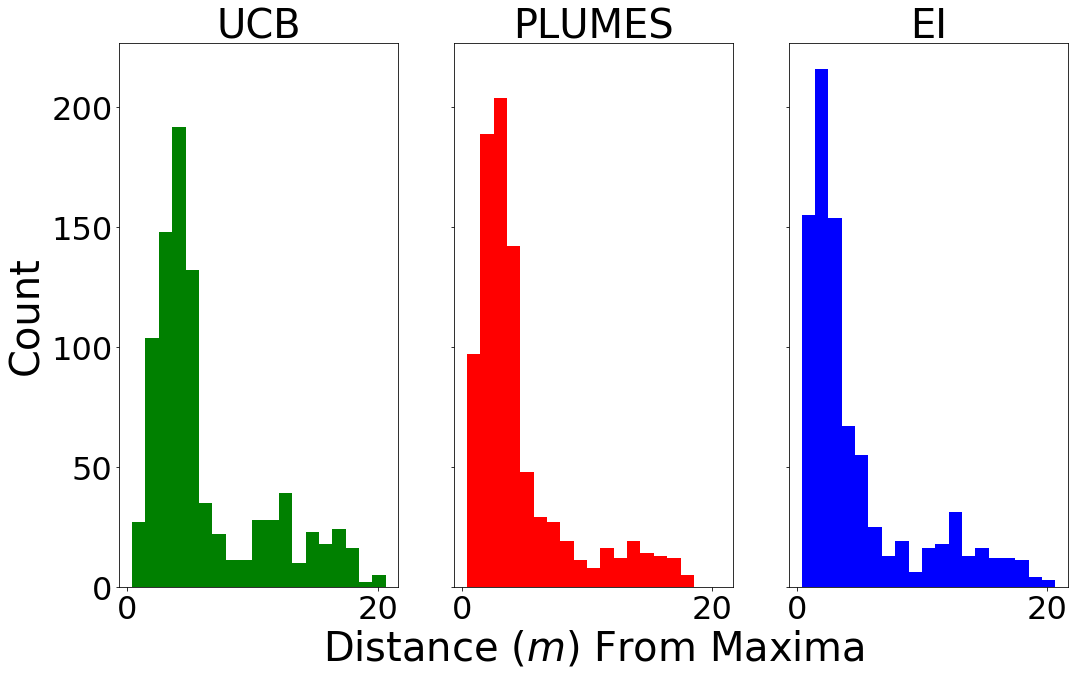

In [706]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("PLUMES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples_nb_complete.png')
plt.show()

[0.22742857142857142, 0.44954128440366975, 0.5443037974683544]
[0.0, 0.0, 0.0]


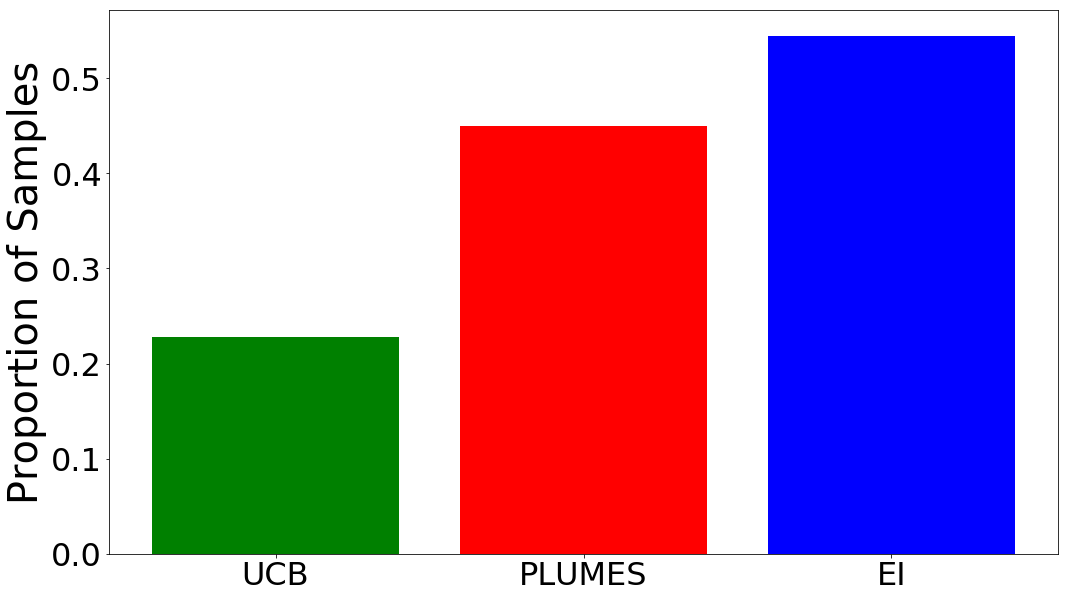

In [709]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'PLUMES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples_nb_complete')
print [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)]
print [np.std(m) for m in (mean_prop, mes_prop, ei_prop)]
plt.show()

Text(0.5,1,u'Location Error in Time')

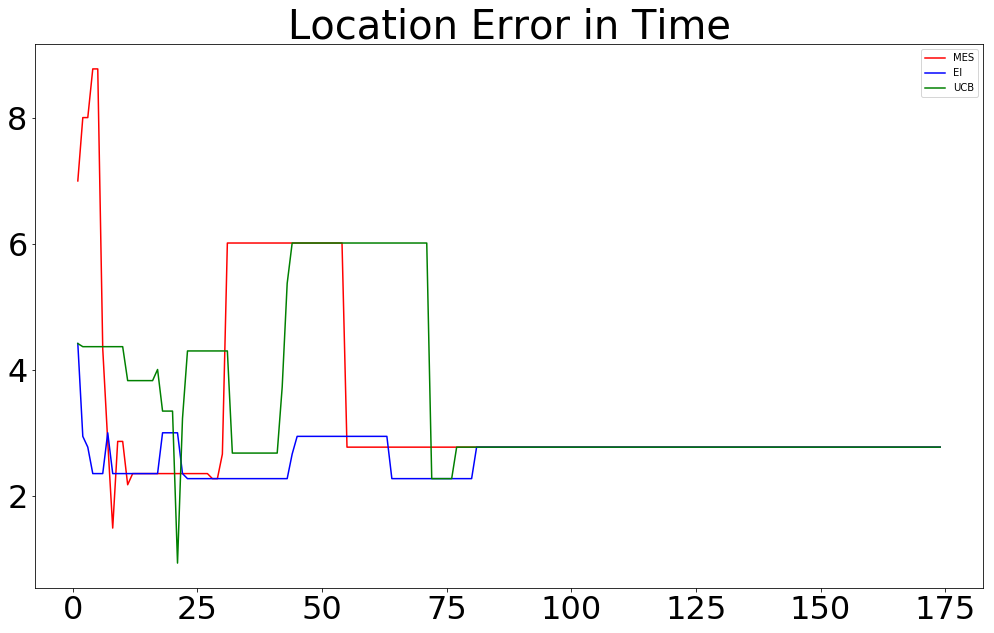

In [636]:
plt.plot(mes_data['max_loc_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_loc_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_loc_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Location Error in Time')

Text(0.5,1,u'Value Error in Time')

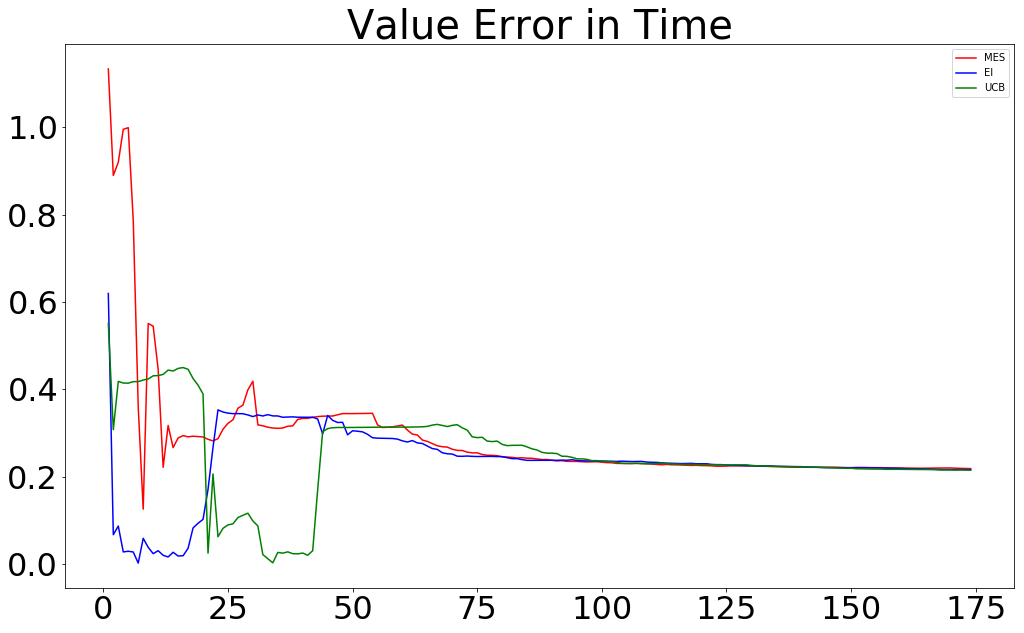

In [637]:
plt.plot(mes_data['max_val_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_val_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_val_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Value Error in Time')

Text(0.5,1,u'MSE in Time')

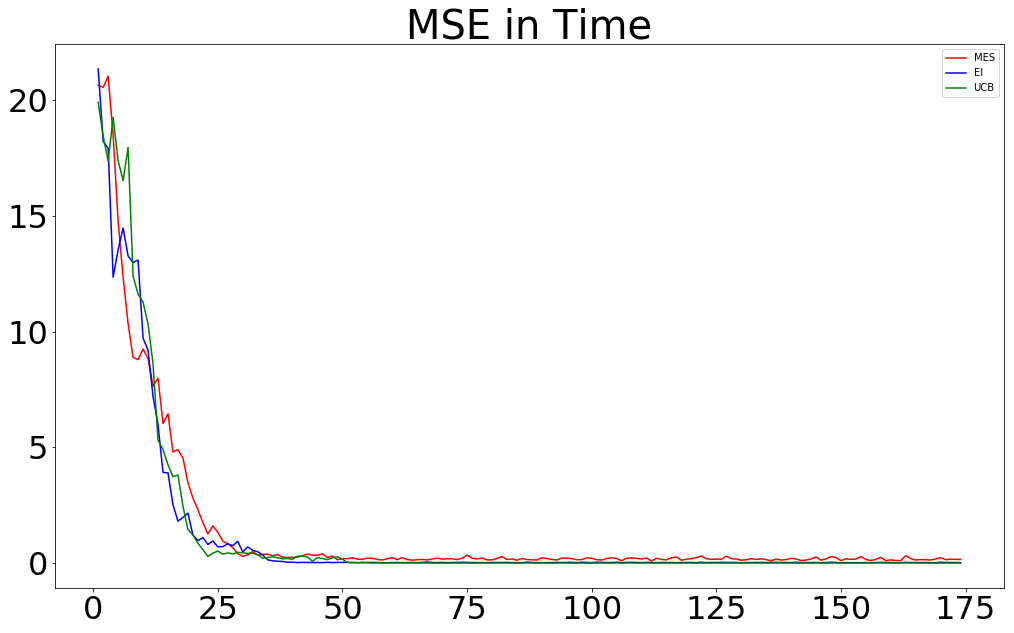

In [638]:
plt.plot(mes_data['MSE'][1:], 'r', label='MES')
plt.plot(ei_data['MSE'][1:], 'b', label='EI')
plt.plot(mean_data['MSE'][1:], 'g', label='UCB')
plt.legend()
plt.title('MSE in Time')

Text(0.5,1,u'Regret in Time')

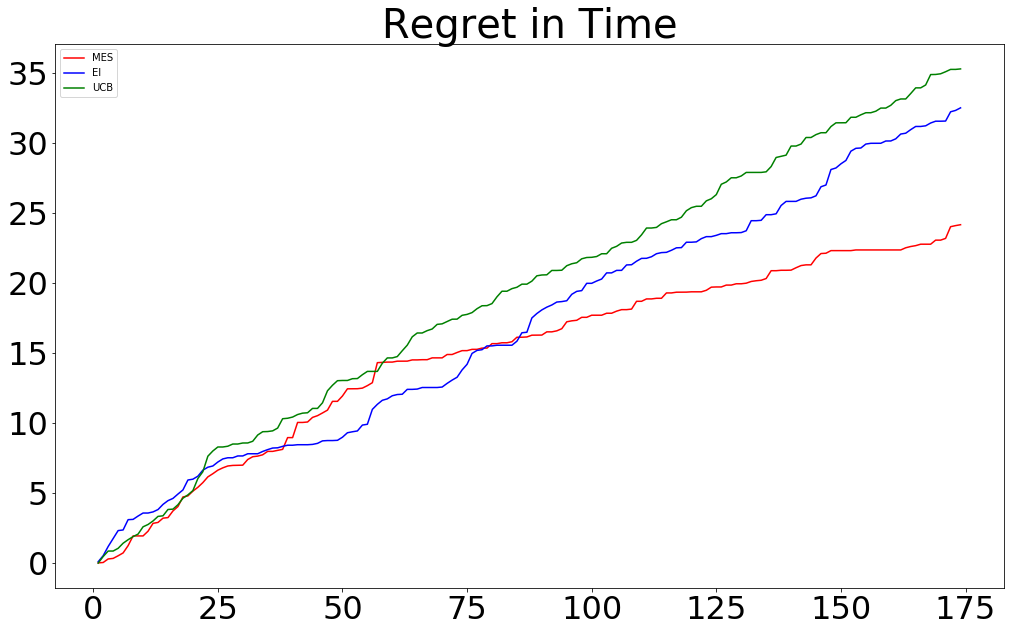

In [639]:
plt.plot(mes_data['info_regret'][1:], 'r', label='MES')
plt.plot(ei_data['info_regret'][1:], 'b', label='EI')
plt.plot(mean_data['info_regret'][1:], 'g', label='UCB')
plt.legend()
plt.title('Regret in Time')

In [640]:
# Now, let's see!
def run_stopping_criteria(v, sampx, sampy):
    #-709064.919  416322.422
    #19.965 23.853
    xlen = 19.965
    ylen = 23.853
    trajlen = 3.0
    time_to_stop = 174
    thresh = 50

    for i in range(174):
        num_samps = 0
        rx = mes_data['robot_loc_x'].values[i+175*v]
        ry = mes_data['robot_loc_y'].values[i+175*v]
        s0x = mes_data['star_obs_loc_x_0'].values[i+175*v]
        s1x = mes_data['star_obs_loc_x_1'].values[i+175*v]
        s0y = mes_data['star_obs_loc_y_0'].values[i+175*v]
        s1y = mes_data['star_obs_loc_y_1'].values[i+175*v]

        if check_star_convergence(s0x, s0y, s1x, s1y, xlen, ylen):
            if check_vehicle_at_stars(rx, ry, s0x, s0y, s1x, s1y, trajlen):
                samp_id = sampsx.index(rx)
                dist = [np.sqrt((x-rx)**2 + (y-ry)**2) for x,y in zip(sampx[0:samp_id], sampy[0:samp_id])]
                for d in dist:
                    if d < 1.5*0.5:
                        num_samps += 1
                if check_samples(num_samps, thresh):
                    time_to_stop = i
                    break
    
    if True:#time_to_stop == 174:
        plt.plot(mes_data['robot_loc_x'].values[1+175*v:174+175*v], 'b')
        plt.plot(mes_data['star_obs_loc_x_0'].values[1+175*v:174+175*v], 'r')
        plt.plot(mes_data['star_obs_loc_x_1'].values[1+175*v:174+175*v], 'g')
        plt.axvline(time_to_stop, color='r')
        plt.title("Stopping Occurs")
        plt.show()
    
    actual_final = [mes_data['info_regret'].values[174+175*v],
                    mes_data['MSE'].values[174+175*v],
                    mes_data['max_loc_error'].values[174+175*v],
                    mes_data['max_val_error'].values[174+175*v]]
    
    stopped_final = [mes_data['info_regret'].values[time_to_stop+175*v],
                     mes_data['MSE'].values[time_to_stop+175*v],
                     mes_data['max_loc_error'].values[time_to_stop+175*v],
                     mes_data['max_val_error'].values[time_to_stop+175*v]
                    ]
    
    return actual_final, stopped_final

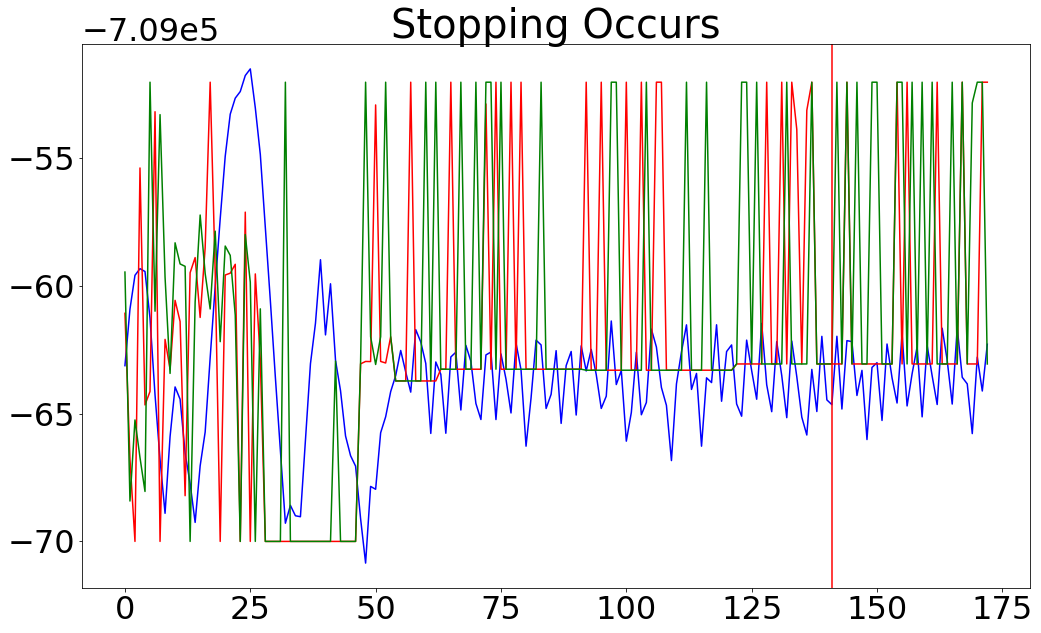

In [641]:
# automating
idx = 0
true = []
stop = []
for i in range(1):
    sampsx = mes_sdata['x'].values.tolist()
    ids = [m for m in range(len(sampsx)) if sampsx[m] == 5.0]
    try:
        nextidx = ids[i+1]
    except:
        nextidx = -1
    sampsx = mes_sdata['x'].values[idx:nextidx].tolist()
    sampsy = mes_sdata['y'].values[idx:nextidx].tolist()
    actual, stopped = run_stopping_criteria(i,sampsx, sampsy)
    idx = nextidx
    true.append(actual)
    stop.append(stopped)

### With Imperfect Kernel Training

In [710]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/partial_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

In [714]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, nan
MES :    174.0, nan
EI  :    174.0, nan
-------------
info_gain
MEAN:    1075.12717194, nan
MES :    1210.16116362, nan
EI  :    1082.01703894, nan
-------------
aqu_fun
MEAN:    63199.8325137, nan
MES :    566.29177133, nan
EI  :    30600.8710416, nan
-------------
MSE
MEAN:    0.16913371924, nan
MES :    0.202801357781, nan
EI  :    0.518469252554, nan
-------------
hotspot_error
MEAN:    0.18127279051, nan
MES :    0.374637700952, nan
EI  :    0.829873017015, nan
-------------
max_loc_error
MEAN:    1.49497445133, nan
MES :    1.74356611959, nan
EI  :    4.30725101952, nan
-------------
max_val_error
MEAN:    0.342878747906, nan
MES :    0.432611070756, nan
EI  :    0.488200979734, nan
-------------
simple_regret
MEAN:    3.0952226485, nan
MES :    1.8289507488, nan
EI  :    6.23117937183, nan
-------------
sample_regret_loc
MEAN:    4.13839390622, nan
MES :    4.26558702269, nan
EI  :    5.05542926954, nan
-------------
sample_regret_val
MEAN:

In [711]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/partial_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 3.0]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 3.0]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 3.0]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


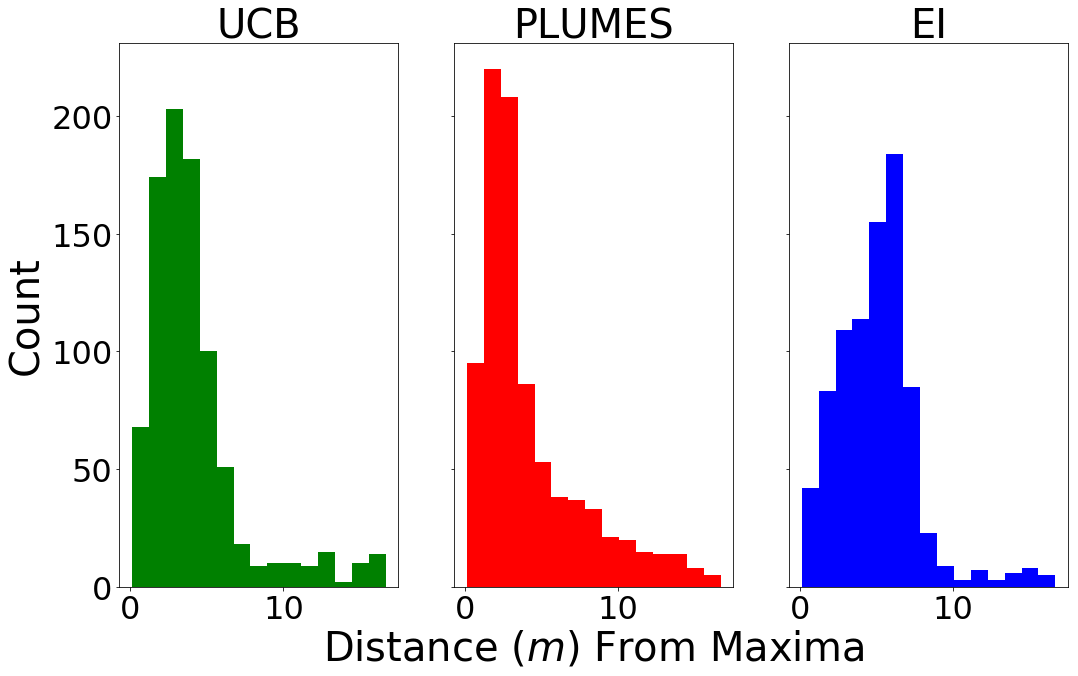

In [712]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("PLUMES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples_nb_partial.png')
plt.show()

[0.40114285714285713, 0.5149082568807339, 0.22607655502392343]
[0.0, 0.0, 0.0]


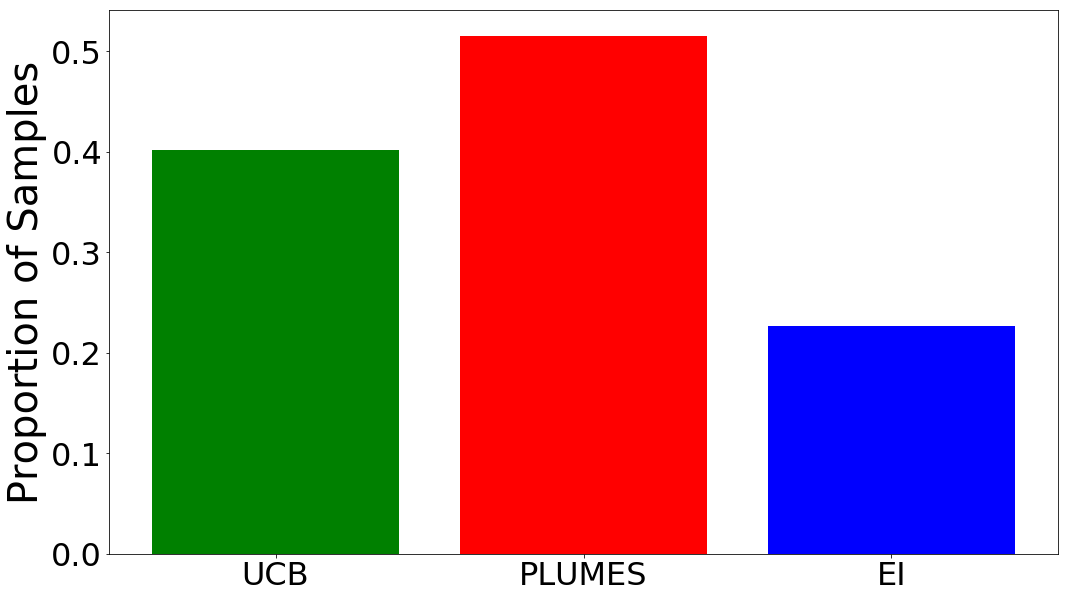

In [713]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'PLUMES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples_nb_partial')
print [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)]
print [np.std(m) for m in (mean_prop, mes_prop, ei_prop)]
plt.show()

Text(0.5,1,u'Location Error in Time')

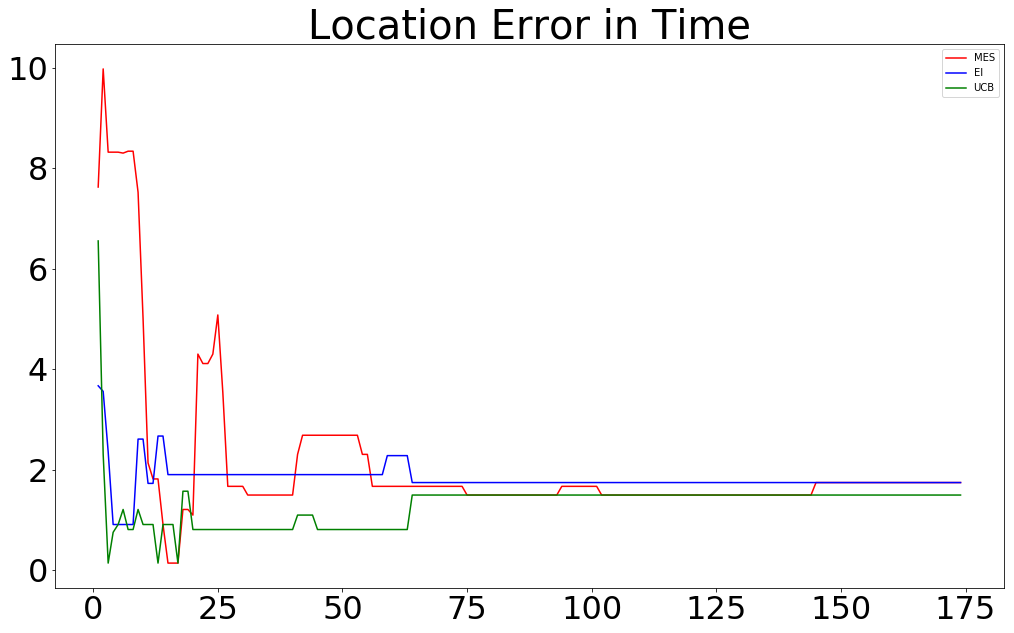

In [646]:
plt.plot(mes_data['max_loc_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_loc_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_loc_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Location Error in Time')

Text(0.5,1,u'Value Error in Time')

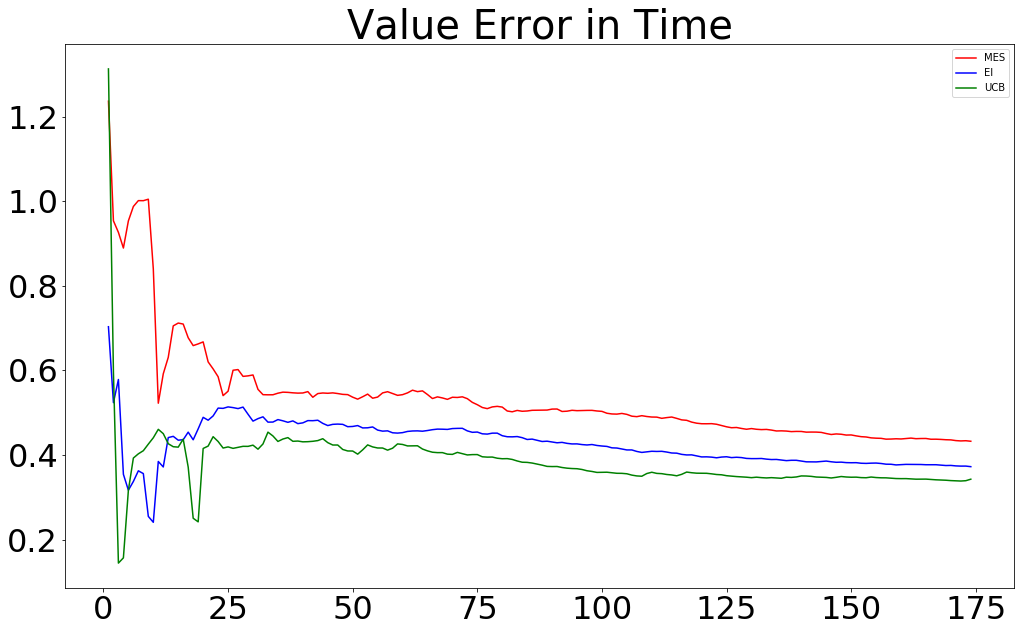

In [647]:
plt.plot(mes_data['max_val_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_val_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_val_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Value Error in Time')

Text(0.5,1,u'MSE in Time')

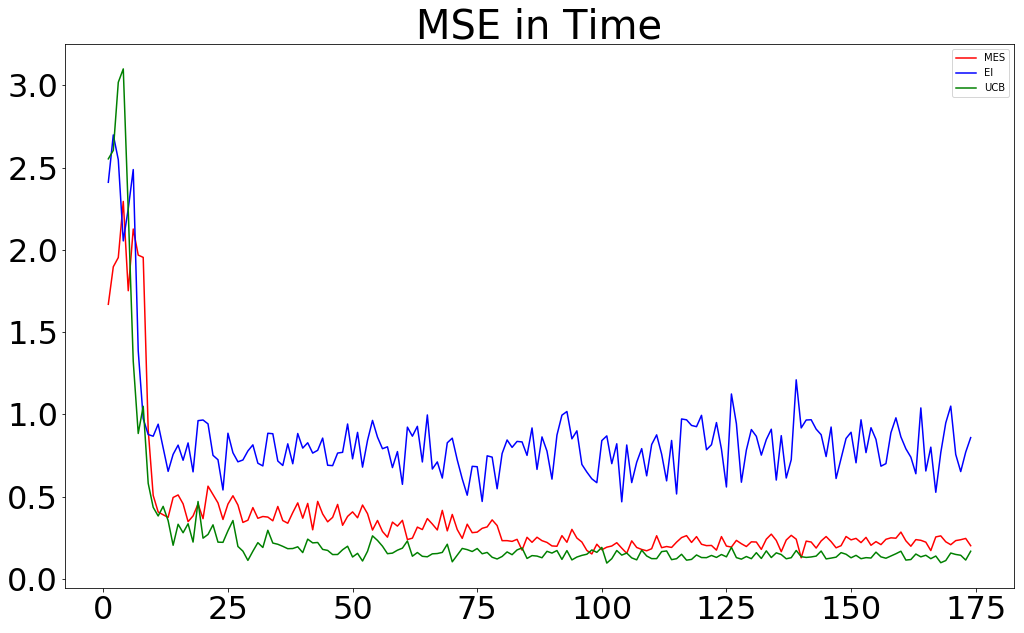

In [648]:
plt.plot(mes_data['MSE'][1:], 'r', label='MES')
plt.plot(ei_data['MSE'][1:], 'b', label='EI')
plt.plot(mean_data['MSE'][1:], 'g', label='UCB')
plt.legend()
plt.title('MSE in Time')

Text(0.5,1,u'Regret in Time')

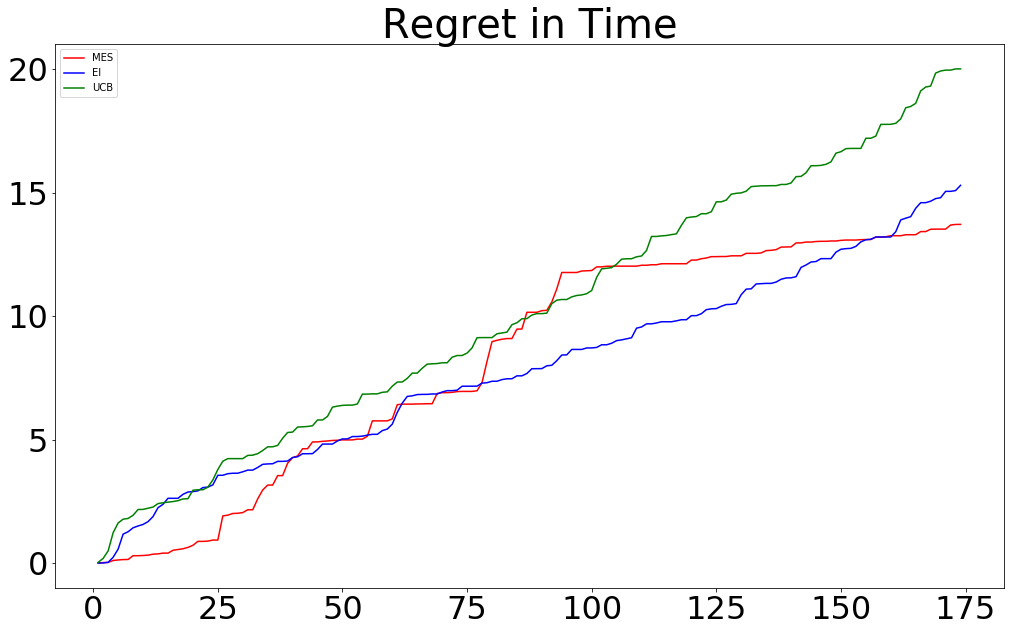

In [649]:
plt.plot(mes_data['info_regret'][1:], 'r', label='MES')
plt.plot(ei_data['info_regret'][1:], 'b', label='EI')
plt.plot(mean_data['info_regret'][1:], 'g', label='UCB')
plt.legend()
plt.title('Regret in Time')

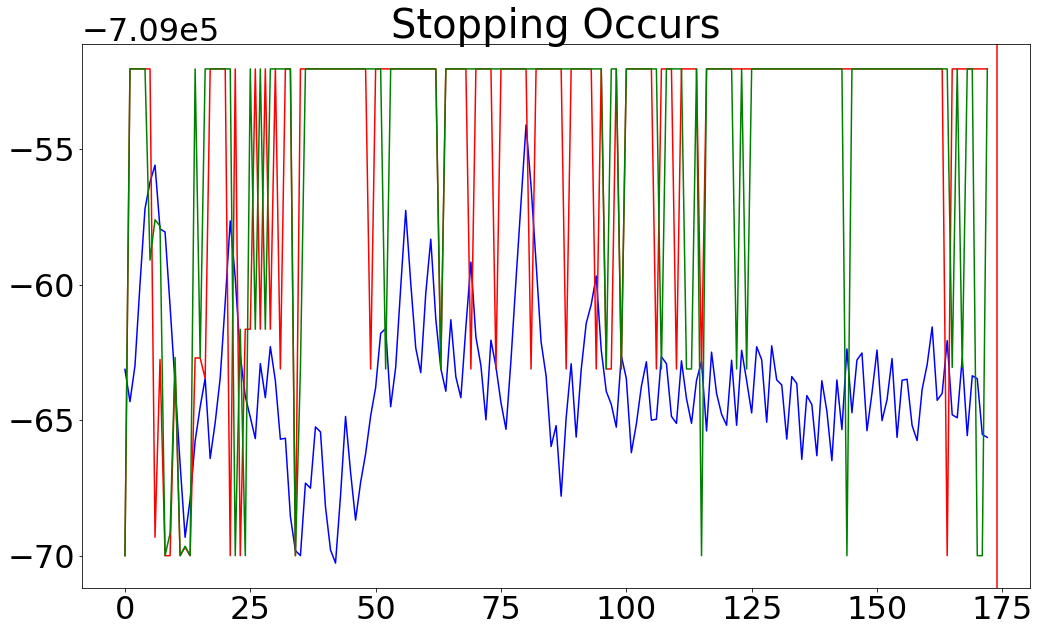

In [650]:
# automating
idx = 0
true = []
stop = []
for i in range(1):
    sampsx = mes_sdata['x'].values.tolist()
    ids = [m for m in range(len(sampsx)) if sampsx[m] == 5.0]
    try:
        nextidx = ids[i+1]
    except:
        nextidx = -1
    sampsx = mes_sdata['x'].values[idx:nextidx].tolist()
    sampsy = mes_sdata['y'].values[idx:nextidx].tolist()
    actual, stopped = run_stopping_criteria(i,sampsx, sampsy)
    idx = nextidx
    true.append(actual)
    stop.append(stopped)

### With Online Learning

In [715]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean_center' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve_center' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes_center' in root:
            f_mes.append(root + "/" + name)

# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

In [720]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, nan
MES :    174.0, nan
EI  :    174.0, nan
-------------
info_gain
MEAN:    3585.71899043, nan
MES :    3473.06426868, nan
EI  :    2765.3715225, nan
-------------
aqu_fun
MEAN:    129120.027889, nan
MES :    1566.08688013, nan
EI  :    37088.1649334, nan
-------------
MSE
MEAN:    0.0512114997495, nan
MES :    0.0833834138686, nan
EI  :    0.2536403705, nan
-------------
hotspot_error
MEAN:    0.133974044355, nan
MES :    0.0554074389754, nan
EI  :    0.367561563485, nan
-------------
max_loc_error
MEAN:    2.77988108794, nan
MES :    2.27994873658, nan
EI  :    2.77988108794, nan
-------------
max_val_error
MEAN:    0.262686708141, nan
MES :    0.261063064699, nan
EI  :    0.249547778733, nan
-------------
simple_regret
MEAN:    2.54124273075, nan
MES :    2.40063460338, nan
EI  :    1.29891059225, nan
-------------
sample_regret_loc
MEAN:    5.76730325516, nan
MES :    5.16850261532, nan
EI  :    4.05062204377, nan
-------------
sample_regret_val


In [716]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean_center' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve_center' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes_center' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 3.0]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 3.0]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 3.0]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


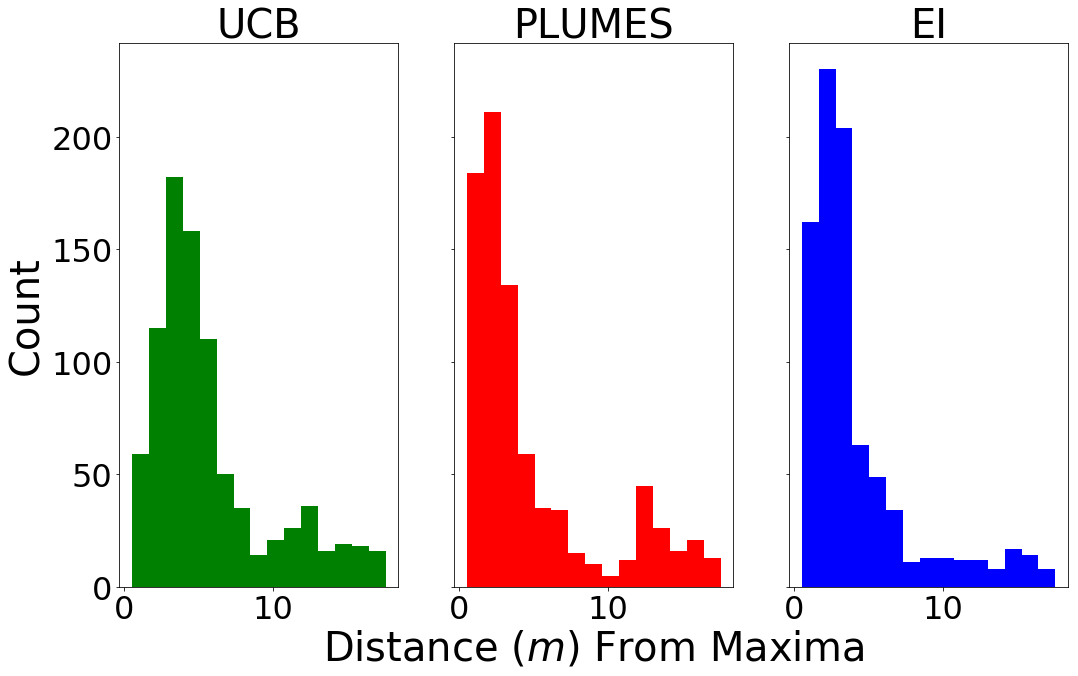

In [717]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("PLUMES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples_nb_unknown.png')
plt.show()

[0.216, 0.522543352601156, 0.5254041570438799]
[0.0, 0.0, 0.0]


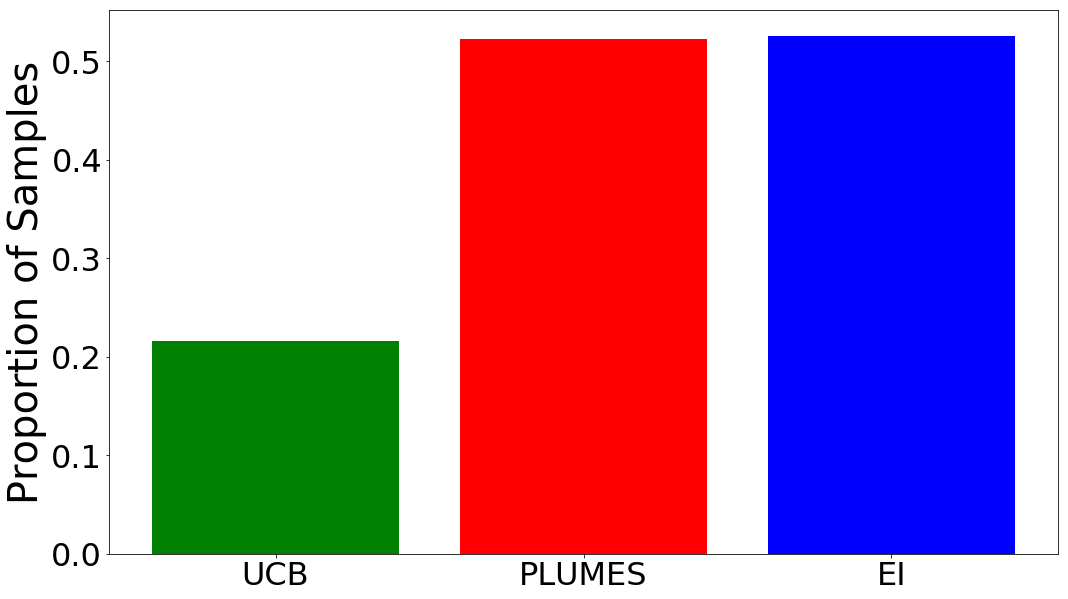

In [719]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'PLUMES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples_nb_unknown')
print [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)]
print [np.std(m) for m in (mean_prop, mes_prop, ei_prop)]
plt.show()

Text(0.5,1,u'Location Error in Time')

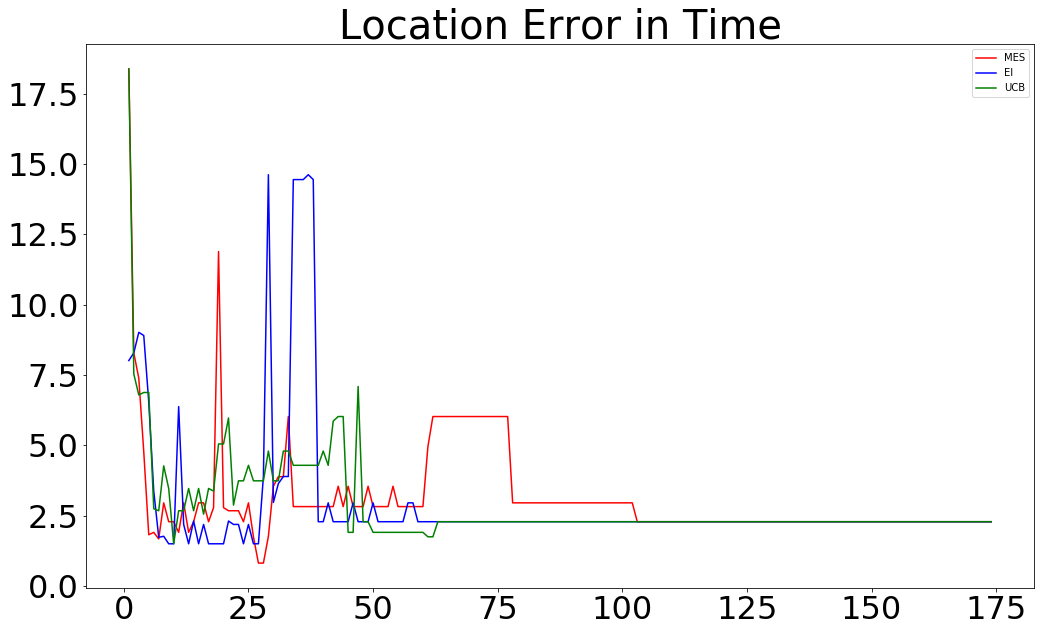

In [655]:
plt.plot(mes_data['max_loc_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_loc_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_loc_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Location Error in Time')

Text(0.5,1,u'Value Error in Time')

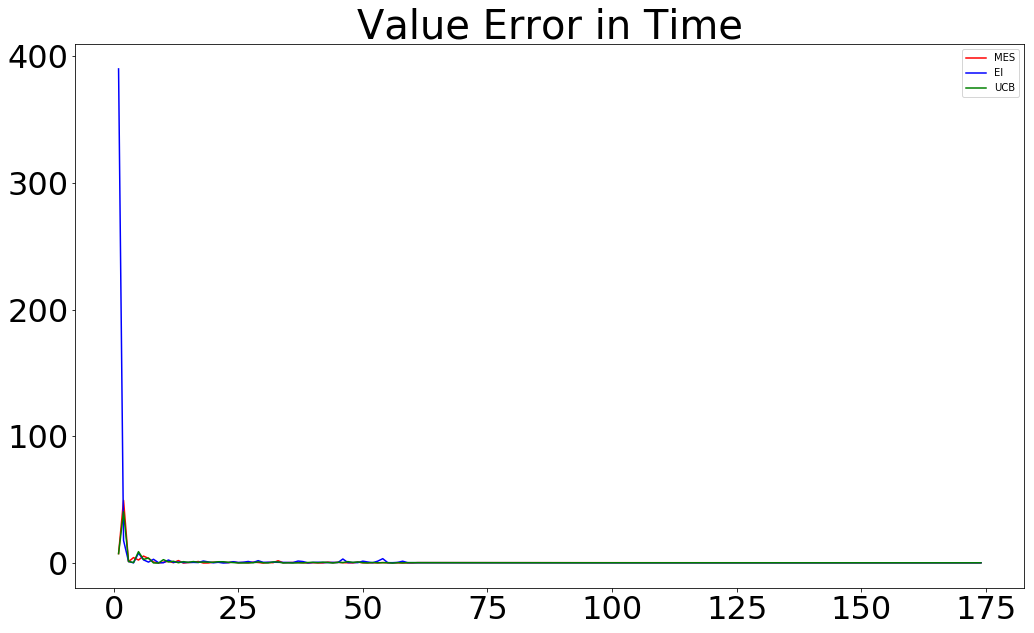

In [656]:
plt.plot(mes_data['max_val_error'][1:], 'r', label='MES')
plt.plot(ei_data['max_val_error'][1:], 'b', label='EI')
plt.plot(mean_data['max_val_error'][1:], 'g', label='UCB')
plt.legend()
plt.title('Value Error in Time')

Text(0.5,1,u'MSE in Time')

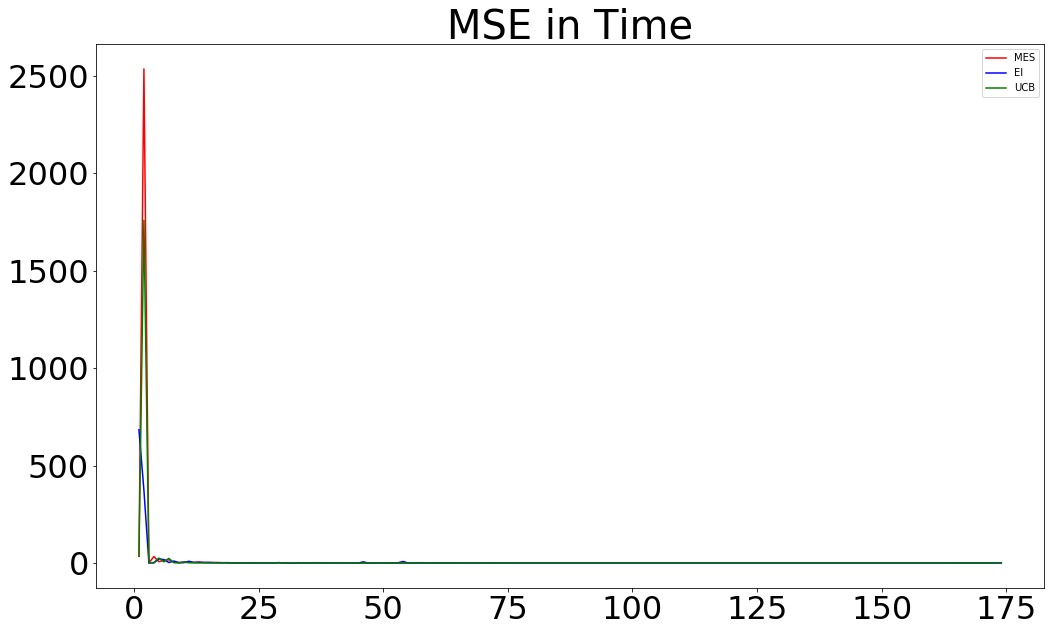

In [657]:
plt.plot(mes_data['MSE'][1:], 'r', label='MES')
plt.plot(ei_data['MSE'][1:], 'b', label='EI')
plt.plot(mean_data['MSE'][1:], 'g', label='UCB')
plt.legend()
plt.title('MSE in Time')

Text(0.5,1,u'Regret in Time')

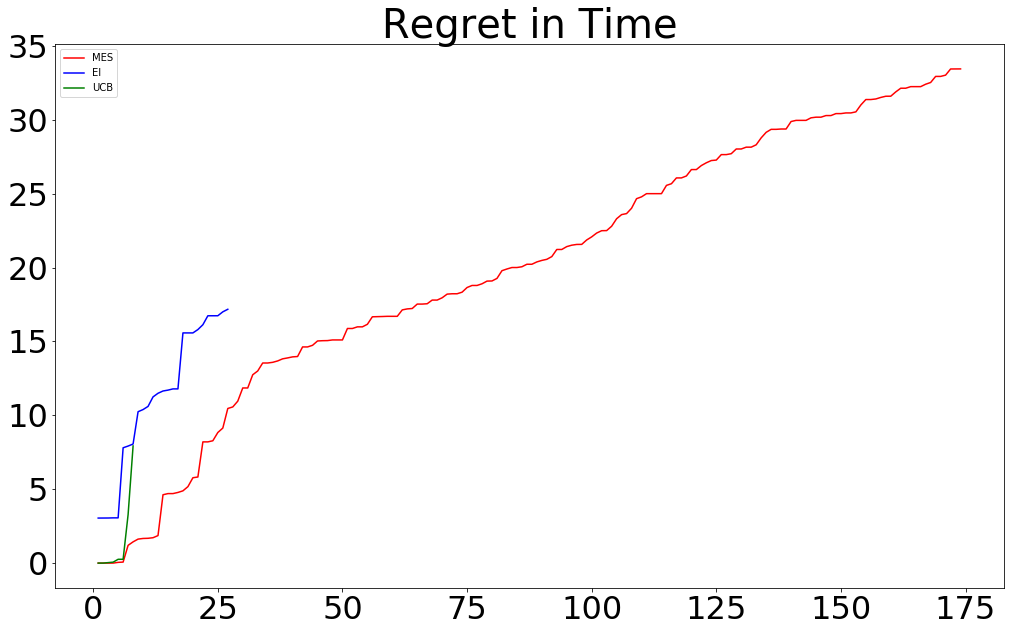

In [658]:
plt.plot(mes_data['info_regret'][1:], 'r', label='MES')
plt.plot(ei_data['info_regret'][1:], 'b', label='EI')
plt.plot(mean_data['info_regret'][1:], 'g', label='UCB')
plt.legend()
plt.title('Regret in Time')

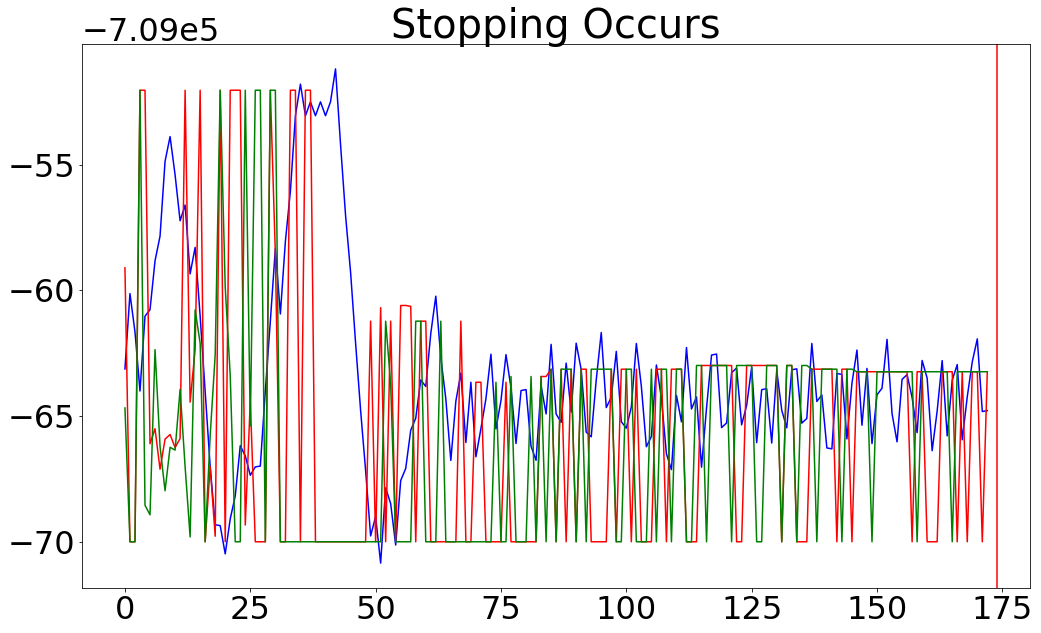

In [659]:
# automating
idx = 0
true = []
stop = []
for i in range(1):
    sampsx = mes_sdata['x'].values.tolist()
    ids = [m for m in range(len(sampsx)) if sampsx[m] == 5.0]
    try:
        nextidx = ids[i+1]
    except:
        nextidx = -1
    sampsx = mes_sdata['x'].values[idx:nextidx].tolist()
    sampsy = mes_sdata['y'].values[idx:nextidx].tolist()
    actual, stopped = run_stopping_criteria(i,sampsx, sampsy)
    idx = nextidx
    true.append(actual)
    stop.append(stopped)

In [722]:
#Look at the numpy kernel file
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/exp_improve_center/'
ei_kern = np.load(path+'kernel_model.npy')
print ei_kern

[6.82276294 4.44469359]


In [724]:
#Look at the numpy kernel file
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mes_center/'
mes_kern = np.load(path+'kernel_model.npy')
print mes_kern

[8.14482711 4.63868092]


In [723]:
#Look at the numpy kernel file
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mean_center/'
mean_center_kern = np.load(path+'kernel_model.npy')
print mean_center_kern

[10.07898804  4.66759791]


### Multiple Trials

In [743]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

In [744]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, 0.0
MES :    174.0, 0.0
EI  :    174.0, 0.0
-------------
info_gain
MEAN:    3379.65432125, 178.76780336
MES :    3342.17357031, 114.026189813
EI  :    3130.61407442, 253.112372105
-------------
aqu_fun
MEAN:    112761.977481, 14372.1657814
MES :    70307.7574181, 59415.7953497
EI  :    81778.7840226, 39572.213213
-------------
MSE
MEAN:    0.0374568141668, 0.0144357717401
MES :    0.0304481496753, 0.00815780057921
EI  :    0.0749947650519, 0.0773605384625
-------------
hotspot_error
MEAN:    0.0947101739077, 0.053007907298
MES :    0.0660346410837, 0.0435770532152
EI  :    0.139368055353, 0.118545945423
-------------
max_loc_error
MEAN:    2.61323697082, 0.288636077631
MES :    2.4465928537, 0.288636077631
EI  :    2.4465928537, 0.288636077631
-------------
max_val_error
MEAN:    0.258404933218, 0.00431565073021
MES :    0.258100703756, 0.00387228378095
EI  :    0.256214476712, 0.00220952825856
-------------
simple_regret
MEAN:    2.4292013761, 0.146

In [745]:
# get the robot samples list
# get the true maxima
max_val = [7.467374396955659]
max_loc = [(-709064.919,  416322.422)]

mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 3.0]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 3.0]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 3.0]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 3.0]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


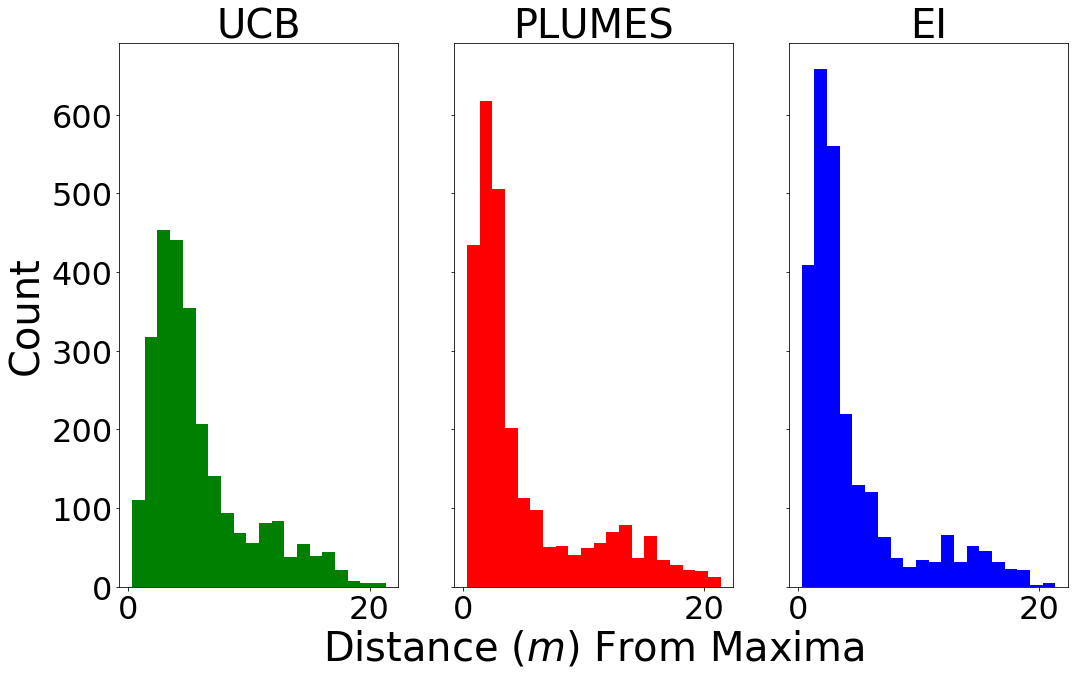

In [746]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("PLUMES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples_nb_unknown.png')
plt.show()

[0.24591239840724377, 0.5295092514001953, 0.5580721902358311]
[0.02116252776684182, 0.04970671509681528, 0.023100158441510213]


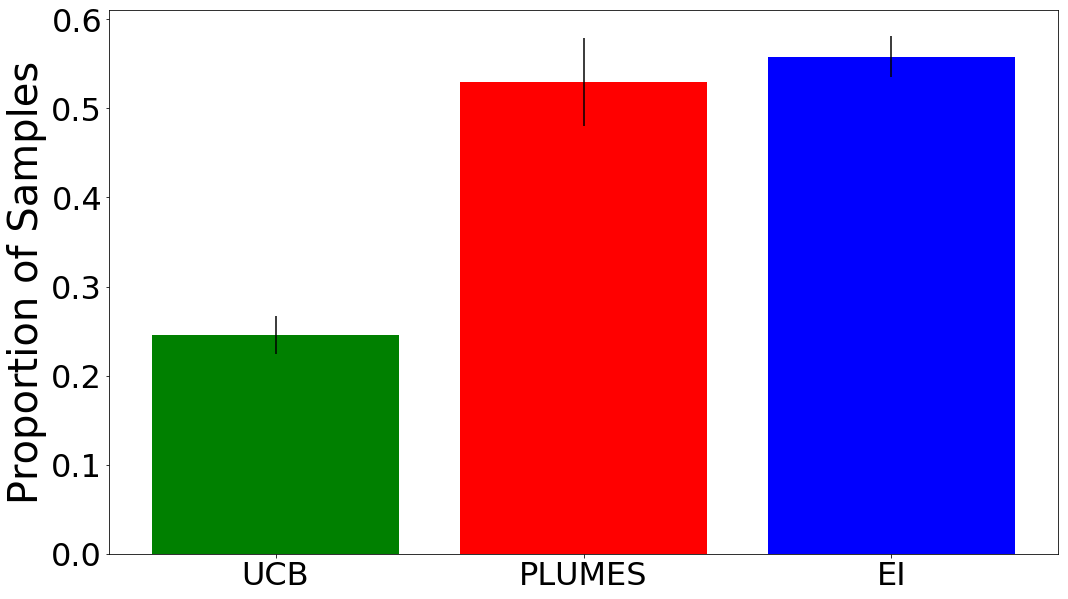

In [747]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'PLUMES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples_nb_unknown')
print [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)]
print [np.std(m) for m in (mean_prop, mes_prop, ei_prop)]
plt.show()

In [749]:
#Look at the numpy kernel file
path= ['/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/exp_improve_center/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/exp_improve_q1/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/exp_improve_q2/']
ei_kern_len = []
ei_kern_var = []
for f in path:
    ei_kern_len.append(np.load(f+'kernel_model.npy')[1])
    ei_kern_var.append(np.load(f+'kernel_model.npy')[0])
    
print np.mean(ei_kern_len), np.std(ei_kern_len)
print np.mean(ei_kern_var), np.std(ei_kern_var)

4.522433363604876 0.06723991517736455
9.006900279446375 3.093403647124809


In [750]:
#Look at the numpy kernel file
path= ['/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mes_center/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mes_q1/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mes_q2/']
mes_kern_len = []
mes_kern_var = []
for f in path:
    mes_kern_len.append(np.load(f+'kernel_model.npy')[1])
    mes_kern_var.append(np.load(f+'kernel_model.npy')[0])
    
print np.mean(mes_kern_len), np.std(mes_kern_len)
print np.mean(mes_kern_var), np.std(mes_kern_var)

4.727688137065603 0.10180520413935508
10.028209944338805 1.544979661502633


In [751]:
#Look at the numpy kernel file
path= ['/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mean_center/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mean_q1/',
       '/home/vpreston/Documents/IPP/informative-path-planning/figures/no_knowledge/mean_q2/']
mean_kern_len = []
mean_kern_var = []
for f in path:
    mean_kern_len.append(np.load(f+'kernel_model.npy')[1])
    mean_kern_var.append(np.load(f+'kernel_model.npy')[0])
    
print np.mean(mean_kern_len), np.std(mean_kern_len)
print np.mean(mean_kern_var), np.std(mean_kern_var)

4.6000031963357575 0.05535724037500546
8.840274022296354 1.3565053861166356
